# 5. Синтаксис

### 5.1 Объяснить значение трех UD-тегов синтаксических отношений на примере фрагмента размеченного корпуса
Корпус [RuEval2017-dev](http://www.dialog-21.ru/media/4155/sorokin.pdf):

In [ ]:
!wget https://www.dropbox.com/s/am6nasx6bx82nhp/RuEval2017-Lenta-news-dev.conllu

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
import urllib.request

url = "https://www.dropbox.com/s/am6nasx6bx82nhp/RuEval2017-Lenta-news-dev.conllu?dl=1"
urllib.request.urlretrieve(url, "RuEval2017-Lenta-news-dev.conllu")


('RuEval2017-Lenta-news-dev.conllu',
 <http.client.HTTPMessage at 0x18d49f4cd00>)

In [ ]:
!curl -L -o RuEval2017-Lenta-news-dev.conllu https://www.dropbox.com/s/am6nasx6bx82nhp/RuEval2017-Lenta-news-dev.conllu?dl=1


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   149  100   149    0     0    128      0  0:00:01  0:00:01 --:--:--   129

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100    17  100    17    0     0      9      0  0:00:01  0:00:01 --:--:-- 17000

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
  0     0    0     0    0     0      0      0 --:

Случайное предложение:

In [ ]:
! head -497 RuEval2017-Lenta-news-dev.conllu | tail -30

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
with open("RuEval2017-Lenta-news-dev.conllu", encoding="utf-8") as f:
    lines = f.readlines()
    for line in lines[467:497]:  # 497-30 = 467
        print(line.strip())


1	По	по	ADP	_	_	3	case	_	_
2	его	его	DET	_	_	3	det	_	_
3	словам	слово	NOUN	_	Animacy=Inan|Case=Dat|Gender=Neut|Number=Plur	9	parataxis	_	_
4	,	,	PUNCT	_	_	3	punct	_	_
5	в	в	ADP	_	_	7	case	_	_
6	московских	московский	ADJ	_	Case=Loc|Degree=Pos|Number=Plur	7	amod	_	_
7	больницах	больница	NOUN	_	Animacy=Inan|Case=Loc|Gender=Fem|Number=Plur	9	obl	_	_
8	он	он	PRON	_	Case=Nom|Gender=Masc|Number=Sing|Person=3	9	nsubj	_	_
9	спал	спать	VERB	_	Aspect=Imp|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	0	root	_	_
10	с	с	ADP	_	_	11	case	_	_
11	пистолетом	пистолет	NOUN	_	Animacy=Inan|Case=Ins|Gender=Masc|Number=Sing	9	obl	_	_
12	Макарова	Макаров	PROPN	_	Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing	11	nmod	_	_
13	,	,	PUNCT	_	_	20	punct	_	_
14	который	который	PRON	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	20	obj	_	_
15	вместе	вместе	ADV	_	Degree=Pos	17	advmod	_	_
16	с	с	ADP	_	_	17	case	_	_
17	орденом	орден	NOUN	_	Animacy=Inan|Case=Ins|Gender=Masc|Number=Sing	20	obl	_	_
18	Кра

In [ ]:
import random

def load_sentences(file_path):
    """
    Загружает предложения из CoNLL-U файла.
    Возвращает список предложений, где каждое предложение представлено списком строк.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Разделяем содержимое файла на предложения по пустым строкам
    sentences = content.strip().split('\n\n')
    return sentences

def parse_sentence(sentence):
    """
    Парсит одно предложение в формате CoNLL-U.
    Возвращает текст предложения и словарь зависимостей.
    """
    lines = sentence.split('\n')
    text = None
    dependencies = []

    for line in lines:
        if line.startswith('# text ='):
            text = line[len('# text ='):].strip()
        elif not line.startswith('#') and line.strip():
            fields = line.split('\t')
            if len(fields) >= 8:
                id_, form, _, pos, _, feats, head, deprel, *_ = fields
                dependencies.append((int(id_), form, pos, int(head), deprel))

    # Если текст предложения не найден, собираем его из токенов
    if text is None:
        forms = [line.split('\t')[1] for line in lines if not line.startswith('#') and line.strip()]
        text = ' '.join(forms)

    return text, dependencies

def explain_ud_tags(dependencies):
    """
    Объясняет три случайных UD-тега из зависимостей предложения.
    """
    ud_tags_to_explain = {}

    # Выбираем три уникальных тега
    unique_tags = set(dep[4] for dep in dependencies)
    tags_to_explain = random.sample(list(unique_tags), min(3, len(unique_tags)))  # Преобразуем set в list

    for tag in tags_to_explain:
        examples = [(form, dependencies[head-1][1]) for id_, form, _, head, deprel in dependencies if deprel == tag]
        if examples:
            example = examples[0]
            ud_tags_to_explain[tag] = example

    return ud_tags_to_explain

def main():
    # Путь к файлу корпуса
    file_path = 'RuEval2017-Lenta-news-dev.conllu'

    # Загружаем предложения
    sentences = load_sentences(file_path)

    # Выбираем случайное предложение
    random_sentence = random.choice(sentences)

    # Парсим предложение
    text, dependencies = parse_sentence(random_sentence)

    # Объясняем три UD-тега
    ud_tags_to_explain = explain_ud_tags(dependencies)

    # Выводим результаты
    print(f"Предложение: {text}\n")
    print("Объяснение UD-тегов:")
    for tag, (word, head) in ud_tags_to_explain.items():
        if tag == 'nsubj':
            explanation = f"{tag} (nominal subject): '{word}' является подлежащим для глагола '{head}'."
        elif tag == 'obl':
            explanation = f"{tag} (oblique nominal): '{word}' указывает на дополнение (например, место или время) для глагола '{head}'."
        elif tag == 'amod':
            explanation = f"{tag} (adjectival modifier): '{word}' модифицирует существительное '{head}', описывая его характеристики."
        else:
            explanation = f"{tag}: '{word}' связано с '{head}' через отношение '{tag}'."
        print(explanation)

if __name__ == "__main_1__":
    main()

In [ ]:
def main_1():
    # Путь к файлу корпуса
    file_path = 'RuEval2017-Lenta-news-dev.conllu'

    # Загружаем предложения
    sentences = load_sentences(file_path)

    # Выбираем случайное предложение
    random_sentence = random.choice(sentences)

    try:
        # Парсим предложение
        text, dependencies = parse_sentence(random_sentence)

        # Объясняем три UD-тега
        ud_tags_to_explain = explain_ud_tags(dependencies)

        # Выводим результаты
        print(f"Предложение: {text}\n")
        print("Объяснение UD-тегов:")
        for tag, (word, head) in ud_tags_to_explain.items():
            if tag == 'nsubj':
                explanation = f"{tag} (nominal subject): '{word}' является подлежащим для глагола '{head}'."
            elif tag == 'obl':
                explanation = f"{tag} (oblique nominal): '{word}' указывает на дополнение (например, место или время) для глагола '{head}'."
            elif tag == 'amod':
                explanation = f"{tag} (adjectival modifier): '{word}' модифицирует существительное '{head}', описывая его характеристики."
            else:
                explanation = f"{tag}: '{word}' связано с '{head}' через отношение '{tag}'."
            print(explanation)
    except ValueError as e:
        print(f"Ошибка при обработке предложения: {e}")

In [ ]:
main_1()

Предложение: Террористы , вооруженные пистолетом и ружьем , требовали предоставить им миллион евро и самолет , чтобы покинуть Грецию .

Объяснение UD-тегов:
obj: 'евро' связано с 'предоставить' через отношение 'obj'.
acl: 'вооруженные' связано с 'Террористы' через отношение 'acl'.
advcl: 'покинуть' связано с 'предоставить' через отношение 'advcl'.


## 5.2 Написать функцию разбиения сложносочиненного предложения из двух частей на простые.

In [ ]:
import random
import re

def load_sentences(file_path):
    """
    Загружает предложения из CoNLL-U файла.
    Возвращает список предложений, где каждое предложение представлено списком строк.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Разделяем содержимое файла на предложения по пустым строкам
    sentences = content.strip().split('\n\n')
    return sentences

def parse_sentence(sentence):
    """
    Парсит одно предложение в формате CoNLL-U.
    Возвращает текст предложения и словарь зависимостей.
    """
    lines = sentence.split('\n')
    text = None
    dependencies = []

    for line in lines:
        if line.startswith('# text ='):
            text = line[len('# text ='):].strip()
        elif not line.startswith('#') and line.strip():
            fields = line.split('\t')
            if len(fields) >= 8:
                id_, form, _, pos, _, feats, head, deprel, *_ = fields
                dependencies.append((int(id_), form, pos, int(head), deprel))

    # Если текст предложения не найден, собираем его из токенов
    if text is None:
        forms = [line.split('\t')[1] for line in lines if not line.startswith('#') and line.strip()]
        text = ' '.join(forms)

    return text, dependencies

def split_compound_sentence(sentence):
    """
    Разбивает сложносочинённое предложение на простые части по сочинительным союзам.

    Args:
        sentence (str): Исходное предложение.

    Returns:
        list: Список простых предложений.
    """
    conjunctions = [
        "то есть", "впрочем", "однако", "иначе", "также", "тоже", "зато",
        "либо", "или", "но", "а", "и", "да", "же"
    ]
    conjunctions = sorted(conjunctions, key=len, reverse=True)
    pattern = r"(?:,\s*)?\b(" + "|".join(map(re.escape, conjunctions)) + r")\b\s+"

    parts = re.split(pattern, sentence)
    simple_sentences = []

    for part in parts:
        stripped = part.strip(" ,.")
        if stripped and stripped not in conjunctions:
            simple_sentences.append(stripped + ".")

    if len(simple_sentences) == 1:
        print(f"Союзы не найдены. Возвращаем исходное предложение: {simple_sentences[0]}")
    else:
        print(f"Разбито на {len(simple_sentences)} частей.")

    return simple_sentences


def main():
    # Путь к файлу корпуса
    file_path = 'RuEval2017-Lenta-news-dev.conllu'

    # Загружаем предложения
    sentences = load_sentences(file_path)
    print(f"Загружено {len(sentences)} предложений из файла.")

    # Выбираем случайное предложение
    random_sentence = random.choice(sentences)
    print(f"\nВыбрано случайное предложение:\n{random_sentence}")

    # Парсим предложение
    text, dependencies = parse_sentence(random_sentence)
    print(f"\nИзвлеченный текст предложения:\n{text}")

    # Разбиваем сложносочиненное предложение на простые части
    print("\nРазбиваем предложение на простые части...")
    simple_sentences = split_compound_sentence(text)

    # Выводим результаты
    print("\nРезультат разбиения:")
    for i, simple_sentence in enumerate(simple_sentences, 1):
        print(f"{i}. {simple_sentence}")

In [ ]:
main()

Загружено 58 предложений из файла.

Выбрано случайное предложение:
1	В	в	ADP	_	_	2	case	_	_
2	июле	июль	NOUN	_	Animacy=Inan|Case=Loc|Gender=Masc|Number=Sing	7	obl	_	_
3	права	право	NOUN	_	Animacy=Inan|Case=Acc|Gender=Neut|Number=Plur	7	obj	_	_
4	на	на	ADP	_	_	5	case	_	_
5	вылов	вылов	NOUN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	3	nmod	_	_
6	также	также	ADV	_	Degree=Pos	7	advmod	_	_
7	получила	получить	VERB	_	Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	0	root	_	_
8	Украина	Украина	PROPN	_	Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing	7	nsubj	_	_
9	.	.	PUNCT	_	_	7	punct	_	_

Извлеченный текст предложения:
В июле права на вылов также получила Украина .

Разбиваем предложение на простые части...
Разбито на 2 частей.

Результат разбиения:
1. В июле права на вылов.
2. получила Украина.


## 5.3. Написать функцию нахождения наименьшего общего предка двух токенов в дереве зависимостей.

In [ ]:
dependencies = [
    (1, 'Я', 'PRON', 2, 'nsubj'),       # Токен 1: "Я" -> родитель: токен 2
    (2, 'купил', 'VERB', 0, 'root'),    # Токен 2: "купил" -> корень (родитель: 0)
    (3, 'хлеб', 'NOUN', 2, 'obj'),      # Токен 3: "хлеб" -> родитель: токен 2
    (4, ',', ',', 5, 'punct'),          # Токен 4: "," -> родитель: токен 5
    (5, 'и', 'CCONJ', 8, 'cc'),         # Токен 5: "и" -> родитель: токен 8
    (6, 'он', 'PRON', 8, 'nsubj'),      # Токен 6: "он" -> родитель: токен 8
    (7, 'оказался', 'VERB', 2, 'conj'), # Токен 7: "оказался" -> родитель: токен 2
    (8, 'очень', 'ADV', 9, 'advmod'),   # Токен 8: "очень" -> родитель: токен 9
    (9, 'вкусным', 'ADJ', 7, 'xcomp'),  # Токен 9: "вкусным" -> родитель: токен 7
    (10, '.', '.', 2, 'punct')          # Токен 10: "." -> родитель: токен 2
]

In [ ]:
token_id_1 = 1  # Токен "Я"
token_id_2 = 6  # Токен "он"
# Вызов функции
lca_id, lca_form = find_lca(dependencies, token_id_1, token_id_2)

# Вывод результата
print(f"Наименьший общий предок: ID={lca_id}, форма='{lca_form}'")

Наименьший общий предок: ID=2, форма='купил'


In [ ]:
import random

def load_sentences(file_path):
    """
    Загружает предложения из CoNLL-U файла.
    Возвращает список предложений, где каждое предложение представлено списком строк.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Разделяем содержимое файла на предложения по пустым строкам
    sentences = content.strip().split('\n\n')
    return sentences

def parse_sentence(sentence):
    """
    Парсит одно предложение в формате CoNLL-U.
    Возвращает текст предложения и словарь зависимостей.
    """
    lines = sentence.split('\n')
    text = None
    dependencies = []

    for line in lines:
        if line.startswith('# text ='):
            text = line[len('# text ='):].strip()
        elif not line.startswith('#') and line.strip():
            fields = line.split('\t')
            if len(fields) >= 8:
                id_, form, _, pos, _, feats, head, deprel, *_ = fields
                dependencies.append((int(id_), form, pos, int(head), deprel))

    # Если текст предложения не найден, собираем его из токенов
    if text is None:
        forms = [line.split('\t')[1] for line in lines if not line.startswith('#') and line.strip()]
        text = ' '.join(forms)

    return text, dependencies

def find_lca(dependencies, token_id_1, token_id_2):
    """
    Находит наименьшего общего предка двух токенов в дереве зависимостей.

    Args:
        dependencies (list): Список зависимостей в формате [(id_, form, pos, head, deprel), ...].
        token_id_1 (int): ID первого токена.
        token_id_2 (int): ID второго токена.

    Returns:
        tuple: (lca_id, lca_form) — ID и форма наименьшего общего предка.
    """
    # Создаем словарь для быстрого доступа к родителю каждого токена
    id_to_head = {dep[0]: dep[3] for dep in dependencies}

    # Функция для получения пути до корня
    def get_path_to_root(token_id):
        path = []
        while token_id != 0:  # 0 означает корень
            path.append(token_id)
            token_id = id_to_head[token_id]
        return path

    # Получаем пути до корня для обоих токенов
    path1 = get_path_to_root(token_id_1)
    path2 = get_path_to_root(token_id_2)

    # Находим наименьшего общего предка
    lca_id = None
    for id1, id2 in zip(reversed(path1), reversed(path2)):
        if id1 == id2:
            lca_id = id1
        else:
            break

    # Находим форму токена по его ID
    id_to_form = {dep[0]: dep[1] for dep in dependencies}
    lca_form = id_to_form[lca_id]

    return lca_id, lca_form

def main_3():
    # Путь к файлу корпуса
    file_path = 'RuEval2017-Lenta-news-dev.conllu'

    # Загружаем предложения
    sentences = load_sentences(file_path)
    print(f"Загружено {len(sentences)} предложений из файла.")

    # Выбираем случайное предложение
    random_sentence = random.choice(sentences)
    print("\nВыбрано случайное предложение:")
    print(random_sentence)

    # Парсим предложение
    text, dependencies = parse_sentence(random_sentence)
    print(f"\nИсходное предложение:\n{text}")
    print("\nЗависимости:")
    for dep in dependencies:
        print(dep)

    # Выбираем два случайных токена
    token_ids = [dep[0] for dep in dependencies]
    if len(token_ids) < 2:
        print("Недостаточно токенов для анализа.")
        return
    token_id_1, token_id_2 = random.sample(token_ids, 2)
    print(f"\nВыбранные токены: ID={token_id_1}, ID={token_id_2}")

    # Находим наименьшего общего предка
    lca_id, lca_form = find_lca(dependencies, token_id_1, token_id_2)
    print(f"Наименьший общий предок: ID={lca_id}, форма='{lca_form}'")

In [ ]:
main_3()

Загружено 58 предложений из файла.

Выбрано случайное предложение:
1	Взрывного	взрывной	ADJ	_	Case=Gen|Degree=Pos|Gender=Neut|Number=Sing	2	amod	_	_
2	устройства	устройство	NOUN	_	Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing	6	nsubj	_	_
3	у	у	ADP	_	_	4	case	_	_
4	злоумышленников	злоумышленник	NOUN	_	Animacy=Anim|Case=Gen|Gender=Masc|Number=Plur	6	obl	_	_
5	не	не	PART	_	Polarity=Neg	2	advmod	_	_
6	было	быть	VERB	_	Gender=Neut|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	0	root	_	_
7	.	.	PUNCT	_	_	6	punct	_	_

Исходное предложение:
Взрывного устройства у злоумышленников не было .

Зависимости:
(1, 'Взрывного', 'ADJ', 2, 'amod')
(2, 'устройства', 'NOUN', 6, 'nsubj')
(3, 'у', 'ADP', 4, 'case')
(4, 'злоумышленников', 'NOUN', 6, 'obl')
(5, 'не', 'PART', 2, 'advmod')
(6, 'было', 'VERB', 0, 'root')
(7, '.', 'PUNCT', 6, 'punct')

Выбранные токены: ID=3, ID=2
Наименьший общий предок: ID=6, форма='было'


In [ ]:
pip install networkx matplotlib


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_dependency_tree(dependencies, token_id_1, token_id_2, lca_id):
    """
    Визуализирует дерево зависимостей с выделением двух токенов и их общего предка.

    Args:
        dependencies (list): [(id, form, pos, head, deprel), ...]
        token_id_1 (int): Первый токен.
        token_id_2 (int): Второй токен.
        lca_id (int): Наименьший общий предок.
    """
    G = nx.DiGraph()

    id_to_form = {dep[0]: dep[1] for dep in dependencies}
    id_to_head = {dep[0]: dep[3] for dep in dependencies}

    # Добавляем ребра (от head к зависимому)
    for dep in dependencies:
        token_id, form, _, head_id, deprel = dep
        if head_id != 0:
            G.add_edge(id_to_form[head_id], form, label=deprel)
        else:
            G.add_node(form)  # корень

    pos = nx.spring_layout(G, seed=42)  # можно заменить на tree layout

    # Цвета
    node_colors = []
    for node in G.nodes:
        if node == id_to_form[token_id_1]:
            node_colors.append("skyblue")
        elif node == id_to_form[token_id_2]:
            node_colors.append("lightgreen")
        elif node == id_to_form[lca_id]:
            node_colors.append("gold")
        else:
            node_colors.append("lightgray")

    # Рисуем граф
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=1800, font_size=10, font_weight='bold')

    # Подписи дуг (названия зависимостей)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkred')

    plt.title("Дерево зависимостей с выделением общего предка", fontsize=18)
    plt.axis('off')
    plt.show()

In [ ]:
visualize_dependency_tree(dependencies, token_id_1, token_id_2, lca_id)



NameError: name 'dependencies' is not defined

In [ ]:
pip install graphviz


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def visualize_dependency_tree(dependencies, token_id_1, token_id_2, lca_id):
    """
    Визуализирует дерево зависимостей с выделением двух токенов и их общего предка.

    Args:
        dependencies (list): [(id, form, pos, head, deprel), ...]
        token_id_1 (int): Первый токен.
        token_id_2 (int): Второй токен.
        lca_id (int): Наименьший общий предок.
    """
    G = nx.DiGraph()
    id_to_form = {dep[0]: dep[1] for dep in dependencies}
    id_to_head = {dep[0]: dep[3] for dep in dependencies}

    # Добавление рёбер
    for dep in dependencies:
        token_id, form, _, head_id, deprel = dep
        if head_id != 0:
            G.add_edge(id_to_form[head_id], form, label=deprel)
        else:
            G.add_node(form)  # корень

    pos = nx.spring_layout(G, seed=42)

    node_colors = []
    for node in G.nodes:
        if node == id_to_form.get(token_id_1):
            node_colors.append("skyblue")
        elif node == id_to_form.get(token_id_2):
            node_colors.append("lightgreen")
        elif node == id_to_form.get(lca_id):
            node_colors.append("gold")
        else:
            node_colors.append("lightgray")

    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
            node_size=1800, font_size=10, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkred')
    plt.title("Дерево зависимостей с выделением общего предка", fontsize=14)
    plt.axis('off')
    plt.show()

def main_3():
    # Путь к файлу корпуса
    file_path = 'RuEval2017-Lenta-news-dev.conllu'

    # Загружаем предложения
    sentences = load_sentences(file_path)
    print(f"Загружено {len(sentences)} предложений из файла.")

    # Выбираем случайное предложение
    random_sentence = random.choice(sentences)
    print("\nВыбрано случайное предложение:")
    print(random_sentence)

    # Парсим предложение
    text, dependencies = parse_sentence(random_sentence)
    print(f"\nИсходное предложение:\n{text}")
    print("\nЗависимости:")
    for dep in dependencies:
        print(dep)

    # Выбираем два случайных токена
    token_ids = [dep[0] for dep in dependencies]
    if len(token_ids) < 2:
        print("Недостаточно токенов для анализа.")
        return
    token_id_1, token_id_2 = random.sample(token_ids, 2)
    print(f"\nВыбранные токены: ID={token_id_1}, ID={token_id_2}")

    # Находим наименьшего общего предка
    lca_id, lca_form = find_lca(dependencies, token_id_1, token_id_2)
    print(f"Наименьший общий предок: ID={lca_id}, форма='{lca_form}'")

    # Визуализация дерева зависимостей
    visualize_dependency_tree(dependencies, token_id_1, token_id_2, lca_id)


Загружено 58 предложений из файла.

Выбрано случайное предложение:
1	Украинский	украинский	ADJ	_	Case=Nom|Degree=Pos|Gender=Masc|Number=Sing	2	amod	_	_
2	летчик	летчик	NOUN	_	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	10	nsubj	_	_
3	,	,	PUNCT	_	_	4	punct	_	_
4	работавший	работать	VERB	_	Aspect=Imp|Case=Nom|Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part|Voice=Act	2	acl	_	_
5	по	по	ADP	_	_	6	case	_	_
6	контракту	контракт	NOUN	_	Animacy=Inan|Case=Dat|Gender=Masc|Number=Sing	4	obl	_	_
7	на	на	ADP	_	_	8	case	_	_
8	Шри-Ланке	Шри-Ланка	PROPN	_	Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing	4	obl	_	_
9	,	,	PUNCT	_	_	4	punct	_	_
10	пилотировал	пилотировать	VERB	_	Aspect=Imp|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act	0	root	_	_
11	самолет	самолет	NOUN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	10	obj	_	_
12	Миг	МиГ	PROPN	_	Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing	11	appos	_	_
13	-	-	PUNCT	_	_	14	punct	_	_
14	27	27	NUM	_	NumForm=Digit	12	appos	_	_
15	российско

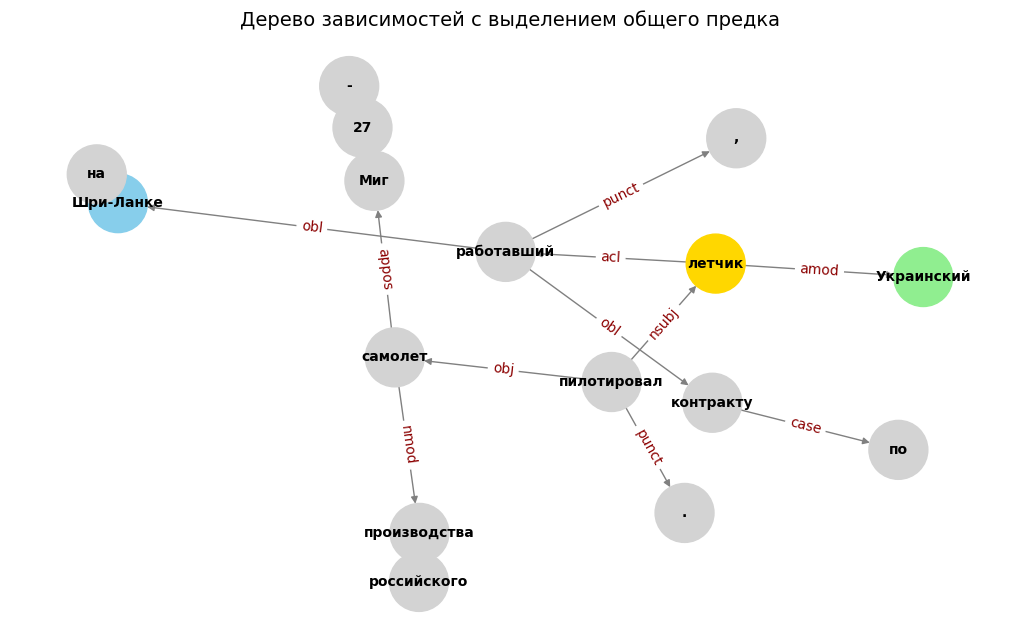

In [ ]:
main_3()

## 5.4 Сравнить три пары предложений двумя методами: сравнением расстояния редактирования деревьев зависимостей и косинусной мерой между BERT-эмбеддингами

In [ ]:
examples = ["Привет, у нас на кухне нашли плесень!",
            "На нашей кухне нашли много всего: бактерии, грибки и позавчерашнее молоко.",
            "Привет, у них в подвале нашли клад!" ]

#### Расстояние редактирования:

In [ ]:
! pip install zss

  Preparing metadata (setup.py) ... done
  Created wheel for zss: filename=zss-1.2.0-py3-none-any.whl size=6725 sha256=73278ea8e92a49dcd64ba80b8eacd88732df3dd5b0f8e3c402abf8c32f670bd0
  Stored in directory: /root/.cache/pip/wheels/e8/3a/21/9f03c8002063200de26717429ca1543466c5feec134a0a73ff
Successfully built zss


In [ ]:
# Поскольку мы будем вычислять расстояние между деревьями зависимостей, здесь нужно инициализировать морфосинтаксический анализатор
# Нам понадобятся не только синтаксис, но и части речи!

### Your code goes here ###
# import ...
# processor = ...
###########################

In [ ]:
from zss import simple_distance, Node


def pos_dep_tree(postags, syntax_dep_tree):
    """ Конвертируем результат морфосинтаксического анализа в zss-дерево из частей речи и синтаксических связей
    NOUN -> advmod -> VERB """

    root = Node('root')
    pos_nodes = {-1: root}
    for i, postag in enumerate(postags):
        pos_nodes[i] = Node(postag)

    for i, dependency_edge in enumerate(syntax_dep_tree):
        # Здесь в зависимости от выбранного формата синтаксических аннотаций заполняем граф значениями
        # <синтаксическое отношение, порядковый номер вершины (токена), порядковый номер его родительской вершины>
        ### Your code goes here ###
        # relation, index, parent_index = ...
        ###########################
        relation_node = Node(relation)
        pos_nodes[parent_index].addkid(relation_node)
        relation_node.addkid(pos_nodes[index])

    return root

def sent_dep_tree(sent):
    """ Получаем список постегов и список синтаксических аннотаций слов предложения, полученные выбранным анализатором (или анализаторами) """
    ### Your code goes here ###
    # result = processor(...
    # postags = ...
    # syntax_dep_tree = ...
    ###########################
    return pos_dep_tree(postags, syntax_dep_tree)

def dep_tree_similarity(dep1, dep2, smoothing=5.0):
    return smoothing / (smoothing + simple_distance(dep1, dep2))

def sentence_similarity(sent1, sent2, smoothing=5.0):
    return dep_tree_similarity(sent_dep_tree(sent1), sent_dep_tree(sent2), smoothing)

In [ ]:
for pair in [[0, 1], [1, 2], [0, 2]]:
    print((examples[pair[0]], examples[pair[1]],
           sentence_similarity(examples[pair[0]], examples[pair[1]])))

NameError: name 'postags' is not defined

#### Контекстные эмбеддинги

In [ ]:
! pip install transformers

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Для примера возьмём не оригинальный BERT (DeepPavlov/rubert-base-cased),
# а sentence-BERT, дообученный на задаче языкового вывода, и, следовательно,
# более точный в семантическом представлении предложений.
# https://huggingface.co/DeepPavlov/rubert-base-cased-sentence#rubert-base-cased-sentence
# Можете заменить на любой другой вариант открытой модели BERT для русского языка.

tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')
model = BertModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [ ]:
def embed_sentence(sentence: str):
    ### Your code goes here ###
    # input_ids = ...  # Токенизация
    # outputs = ...  # Предсказания модели
    ###########################
    return torch.mean(outputs[0].detach(), axis=0).numpy()

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Загрузка предобученной модели BERT
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

def get_bert_embedding(text):
    """ Получаем эмбеддинг предложения с помощью BERT """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Используем среднее значение последнего слоя для получения эмбеддинга предложения
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def bert_similarity(sent1, sent2):
    """ Вычисляем косинусную меру между BERT-эмбеддингами двух предложений """
    embedding1 = get_bert_embedding(sent1)
    embedding2 = get_bert_embedding(sent2)
    return cosine_similarity([embedding1], [embedding2])[0][0]

# Сравнение предложений
print("\nСравнение предложений методом косинусной меры между BERT-эмбеддингами:")
for pair in [[0, 1], [1, 2], [0, 2]]:
    print((examples[pair[0]], examples[pair[1]],
           bert_similarity(examples[pair[0]], examples[pair[1]])))

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



Сравнение предложений методом косинусной меры между BERT-эмбеддингами:
('Привет, у нас на кухне нашли плесень!', 'На нашей кухне нашли много всего: бактерии, грибки и позавчерашнее молоко.', np.float32(0.62720203))
('На нашей кухне нашли много всего: бактерии, грибки и позавчерашнее молоко.', 'Привет, у них в подвале нашли клад!', np.float32(0.5460816))
('Привет, у нас на кухне нашли плесень!', 'Привет, у них в подвале нашли клад!', np.float32(0.8041674))


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import random

# Загрузка предобученной модели BERT
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

def get_bert_embedding(text):
    """ Получаем эмбеддинг предложения с помощью BERT """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Используем среднее значение последнего слоя для получения эмбеддинга предложения
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def bert_similarity(sent1, sent2):
    """ Вычисляем косинусную меру между BERT-эмбеддингами двух предложений """
    embedding1 = get_bert_embedding(sent1)
    embedding2 = get_bert_embedding(sent2)
    return cosine_similarity([embedding1], [embedding2])[0][0]

def load_sentences(file_path):
    """
    Загружает предложения из CoNLL-U файла.
    Возвращает список текстов предложений.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Разделяем содержимое файла на предложения по пустым строкам
    sentences = content.strip().split('\n\n')

    # Извлекаем текст каждого предложения
    texts = []
    for sentence in sentences:
        for line in sentence.split('\n'):
            if line.startswith('# text ='):
                text = line[len('# text ='):].strip()
                texts.append(text)
                break  # Переходим к следующему предложению
    return texts

def main():
    # Путь к файлу корпуса
    file_path = 'RuEval2017-Lenta-news-dev.conllu'

    # Загружаем предложения
    sentences = load_sentences(file_path)
    print(f"Загружено {len(sentences)} предложений из файла.")

    # Выбираем три случайных предложения
    if len(sentences) < 3:
        print("Недостаточно предложений для анализа.")
        return
    random_sentences = random.sample(sentences, 3)
    print("\nВыбранные случайные предложения:")
    for i, sent in enumerate(random_sentences, 1):
        print(f"{i}. {sent}")

    # Вычисляем косинусную меру между BERT-эмбеддингами
    print("\nСравнение предложений методом косинусной меры между BERT-эмбеддингами:")
    pairs = [[0, 1], [1, 2], [0, 2]]  # Пары для сравнения
    for pair in pairs:
        sent1 = random_sentences[pair[0]]
        sent2 = random_sentences[pair[1]]
        similarity = bert_similarity(sent1, sent2)
        print(f"Сходство между '{sent1}' и '{sent2}': {similarity:.4f}")

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
main()

Загружено 0 предложений из файла.
Недостаточно предложений для анализа.


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import random

# Загрузка предобученной модели BERT
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

def get_bert_embedding(text):
    """ Получаем эмбеддинг предложения с помощью BERT """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Используем среднее значение последнего слоя для получения эмбеддинга предложения
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def bert_similarity(sent1, sent2):
    """ Вычисляем косинусную меру между BERT-эмбеддингами двух предложений """
    embedding1 = get_bert_embedding(sent1)
    embedding2 = get_bert_embedding(sent2)
    return cosine_similarity([embedding1], [embedding2])[0][0]

def load_sentences(file_path):
    """
    Загружает предложения из CoNLL-U файла.
    Возвращает список текстов предложений.
    """
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()

    # Разделяем содержимое файла на предложения по пустым строкам
    sentences = content.strip().split('\n\n')

    # Извлекаем текст каждого предложения
    texts = []
    for sentence in sentences:
        lines = sentence.split('\n')
        text = None

        # Пытаемся найти строку с текстом предложения
        for line in lines:
            if line.startswith('# text ='):
                text = line[len('# text ='):].strip()
                break

        # Если текст не найден, собираем его из токенов
        if text is None:
            forms = [line.split('\t')[1] for line in lines if not line.startswith('#') and line.strip()]
            text = ' '.join(forms)

        # Добавляем текст в список
        texts.append(text)

    return texts

def main():
    # Путь к файлу корпуса
    file_path = 'RuEval2017-Lenta-news-dev.conllu'

    # Загружаем предложения
    sentences = load_sentences(file_path)
    print(f"Загружено {len(sentences)} предложений из файла.")

    # Выбираем три случайных предложения
    if len(sentences) < 3:
        print("Недостаточно предложений для анализа.")
        return
    random_sentences = random.sample(sentences, 3)
    print("\nВыбранные случайные предложения:")
    for i, sent in enumerate(random_sentences, 1):
        print(f"{i}. {sent}")

    # Вычисляем косинусную меру между BERT-эмбеддингами
    print("\nСравнение предложений методом косинусной меры между BERT-эмбеддингами:")
    pairs = [[0, 1], [1, 2], [0, 2]]  # Пары для сравнения
    for pair in pairs:
        sent1 = random_sentences[pair[0]]
        sent2 = random_sentences[pair[1]]
        similarity = bert_similarity(sent1, sent2)
        print(f"Сходство между '{sent1}' и '{sent2}': {similarity:.4f}")

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
main()

Загружено 58 предложений из файла.

Выбранные случайные предложения:
1. Водитель КАМАЗа совершил наезд на сотрудника милиции , от полученного удара милиционер скончался на месте , а затем на автомобиль УАЗ , в котором находились еще трое сотрудников милиции .
2. Детали и фрагменты моста в ближайшее время будут доставлены по железной дороге из Сибири .
3. Украинский летчик , работавший по контракту на Шри-Ланке , пилотировал самолет Миг - 27 российского производства .

Сравнение предложений методом косинусной меры между BERT-эмбеддингами:
Сходство между 'Водитель КАМАЗа совершил наезд на сотрудника милиции , от полученного удара милиционер скончался на месте , а затем на автомобиль УАЗ , в котором находились еще трое сотрудников милиции .' и 'Детали и фрагменты моста в ближайшее время будут доставлены по железной дороге из Сибири .': 0.4891
Сходство между 'Детали и фрагменты моста в ближайшее время будут доставлены по железной дороге из Сибири .' и 'Украинский летчик , работавший по кон

# 6. NER

### 6.1 Маскировать все адреса и имена в электронном письме.

In [ ]:
email = """

Dear John Smith,

As a head chef, I must express my concern regarding the rumors about mold appearing near some kitchens in Building 13 at the address: 42 Leo Tolstoy Street. I would like to draw your attention to the fact that any food processed, prepared, or consumed near mold can be contaminated and unsafe to eat.

If these reports are confirmed, I will have to close several canteens. A possible redistribution of the workload to the kitchens in the following buildings may be necessary:
No. 9 — 99 Churchill Road
No. 10 — 10 Queen Street
No. 11 — 17 Newton Avenue


Sincerely,
Aleksei Martynov
martyn@supercorp.ru
"""

In [ ]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.4 MB/s eta 0:00:000:00:010:00:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
import re


nlp = spacy.load("en_core_web_sm")
doc = nlp(email)

# Места для замены
replacements = []
# Добавим вручную паттерны для зданий и адресов

patterns = [
    (r"\b(Building|No\.)\s+\d+\b", "[MASKED]"),  # Building 13, No. 10
    (r"\d{1,5}\s+[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\s(?:Road|Street|Avenue|Lane|Drive)\b", "[MASKED]")  # 42 Leo Tolstoy Street, etc.
]
building_pattern = r"\b(Building|No\.)\s+\d+\b"
address_pattern = r"\d{1,5}\s+[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\s(?:Road|Street|Avenue|Lane|Drive)\b"


# Выбираем только PERSON, GPE, LOC, EMAIL и т.п.
for ent in doc.ents:
    if ent.label_ in ["PERSON", "GPE", "ORG", "LOC"]:
        replacements.append((ent.start_char, ent.end_char, "[MASKED]"))


for match in re.finditer(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", email):
    replacements.append((match.start(), match.end(), "[EMAIL]"))
for pattern, replacement in patterns:
    for match in re.finditer(pattern, email):
        replacements.append((match.start(), match.end(), replacement))

# Сортируем в обратном порядке, чтобы не сдвигать индексы при замене
replacements = sorted(replacements, reverse=True)

# Применяем замены
masked_email = email
for start, end, replacement in replacements:
    masked_email = masked_email[:start] + replacement + masked_email[end:]





In [ ]:
print(masked_email)




Dear [MASKED],

As a head chef, I must express my concern regarding the rumors about mold appearing near some kitchens in [MASKED] at the address: [MASKED]like to draw your attention to the fact that any food processed, prepared, or consumed near mold can be contaminated and unsafe to eat.

If these reports are confirmed, I will have to close several canteens. A possible redistribution of the workload to the kitchens in the following buildings may be necessary:
[MASKED] — [MASKED]  
[MASKED] — [MASKED]  
[MASKED] — [MASKED]


Sincerely,  
[MASKED]  
[EMAIL]



In [ ]:
email = """
Уважаемая Эльвира Геннадьевна,

Как шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: Льва Толстого, 42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.

Если эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:
№9 площадь Гагарина, 99
№10 улица Южная, 10
№11 Кривой проспект, 17

С уважением,
Алексей Мартынов.
martyn@supercorp.ru
"""

In [ ]:
import re
from natasha import (
    Segmenter,
    NewsEmbedding,
    NewsNERTagger,
    Doc
)

# Инициализация компонентов
segmenter = Segmenter()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

def mask_russian_email(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)

    masked_text = text
    spans = sorted(doc.spans, key=lambda span: span.start, reverse=True)

    for span in spans:
        if span.type in {"PER", "LOC", "ORG"}:
            masked_text = masked_text[:span.start] + "[MASKED]" + masked_text[span.stop:]

    # Маскировка email-адресов
    masked_text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '[EMAIL]', masked_text)

    return masked_text

# --- Вывод с сохранением форматирования ---


In [ ]:
mask_russian_email(email)

'\nУважаемая [MASKED],\n\nКак шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: [MASKED], 42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.\n\nЕсли эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:\n№9 площадь [MASKED], 99\n№10 улица [MASKED], 10\n№11 [MASKED], 17\n\nС уважением,\n[MASKED].\n[EMAIL]\n'

In [ ]:
print("\n" + mask_russian_email(email).strip())


Уважаемая [MASKED],

Как шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: [MASKED], 42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.

Если эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:
№9 площадь [MASKED], 99
№10 улица [MASKED], 10
№11 [MASKED], 17

С уважением,
[MASKED].
[EMAIL]


### 6.2 Собрать из набора описаний IT-вакансий топ-5  требуемых скиллов для Java-разработчика

Загрузка данных:

In [ ]:
! wget https://www.dropbox.com/s/resrekpsxk3yd4d/vacancies.csv

--2025-05-07 12:53:47--  https://www.dropbox.com/s/resrekpsxk3yd4d/vacancies.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/arvkzclltciuf39v5w8ke/vacancies.csv?rlkey=cmdn4394g12a5vdjwjpuimmbw [following]
--2025-05-07 12:53:48--  https://www.dropbox.com/scl/fi/arvkzclltciuf39v5w8ke/vacancies.csv?rlkey=cmdn4394g12a5vdjwjpuimmbw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1d2b709240175185d00fa02bb3.dl.dropboxusercontent.com/cd/0/inline/CpPOjVqFxFG-SHGEa1mzKFnp7Kb2MzgMF_iwyQlLF7EqHzXCZ4NyboE73NGVzJMALJFZhXZvZu92EuQv4uR3sHoTvOG5Y-UatuNIXjZ5j6aaWVEjmprU0T4nNSIfsWL9pSaenICL-2hHjYY64Lxr6boW/file# [following]
--2025-05-07 12:53:49--  https://uc1d2b709240175185d00fa02bb3.dl.dropboxusercontent.com/cd/0/inl

In [ ]:
! head vacancies.csv

id,name,city,employer,publication_date,description
29654783,Инженер удаленной технической поддержки рабочих мест,Самара,Сбербанк,2019-04-26T14:37:49+0300,"<p><strong>Обязанности:</strong></p> <p>• Обработка/решение поступающих заявок, консультирование сотрудников банка по вопросам технической поддержки автоматизированных рабочих мест пользователей (ПК/Оргтехника/Мобильные устройства).</p> <p>• Удаленное решение заявок по установке/настройке ПО средствами SCCM и с использованием средств удаленного администрирования (RDP).</p> <p>• Удаленное взаимодействие с сервисными компаниями по вопросам оказания услуги тех.поддержки.</p> <p><strong>Требования:</strong></p> <p>• Законченное высшее образование по направлению Информационные технологии.</p> <p>• Желателен опыт работы в сфере ИТ (сопровождение рабочих мест, инфраструктуры, серверов, корпоративной телефонии).</p> <p>• Экспертное знание MS Windows 7/10, MS Office 2010/2016.</p> <p>Опыт работы/администрирования MacOS/iOS, Linux.</p> <p>• Оп

In [ ]:
import requests

url = "https://www.dropbox.com/scl/fi/arvkzclltciuf39v5w8ke/vacancies.csv?rlkey=cmdn4394g12a5vdjwjpuimmbw&dl=1"
response = requests.get(url)

with open("vacancies.csv", "wb") as f:
    f.write(response.content)


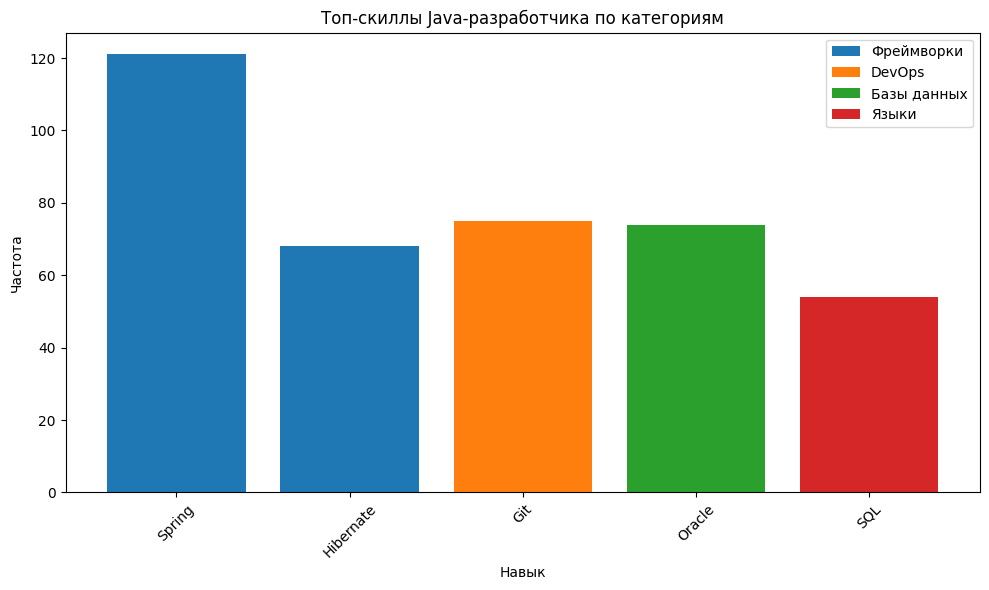

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
from natasha import Segmenter, NewsEmbedding, NewsNERTagger, Doc
import re
from collections import Counter
import matplotlib.pyplot as plt

# === Шаг 1: Загрузка и подготовка ===
df = pd.read_csv("vacancies.csv")
java_vacancies = df[df['name'].str.contains("Java", case=False, na=False)]

java_text = " ".join(
    BeautifulSoup(desc, "html.parser").get_text(separator=" ")
    for desc in java_vacancies['description'].dropna()
)

# === Шаг 2: Извлечение скиллов ===
segmenter = Segmenter()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

doc = Doc(java_text)
doc.segment(segmenter)
doc.tag_ner(ner_tagger)

ner_skills = [span.text for span in doc.spans if span.type == 'ORG']
regex_skills = re.findall(r'\b([A-Z][A-Za-z0-9\+\#\.\-]{2,})\b', java_text)
all_skills = ner_skills + regex_skills

# === Шаг 3: Очистка и подсчёт ===
stopwords = {
    "Сбербанк", "Сбербанка", "Банка", "Россия", "Москва", "РФ",
    "ТК", "Java", "Работа", "Компания", "Требования", "Условия"
}
filtered = [s for s in all_skills if s not in stopwords and s.lower() not in [w.lower() for w in stopwords]]
top_skills = Counter(filtered).most_common(5)
df_skills = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])

# === Шаг 4: Категоризация ===
categories = {
    "Языки": {"Java", "SQL", "Python"},
    "Базы данных": {"Oracle", "PostgreSQL", "MySQL", "MongoDB", "IBM"},
    "Фреймворки": {"Spring", "Hibernate", "Maven", "Junit", "React", "Redux"},
    "DevOps": {"Git", "Jenkins", "Docker", "Kubernetes"}
}

def categorize(skill):
    for category, names in categories.items():
        if skill in names:
            return category
    return "Другое"

df_skills["Category"] = df_skills["Skill"].apply(categorize)

# === Шаг 5: Визуализация ===
plt.figure(figsize=(10, 6))
for category in df_skills["Category"].unique():
    subset = df_skills[df_skills["Category"] == category]
    plt.bar(subset["Skill"], subset["Frequency"], label=category)

plt.title("Топ-скиллы Java-разработчика по категориям")
plt.xlabel("Навык")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


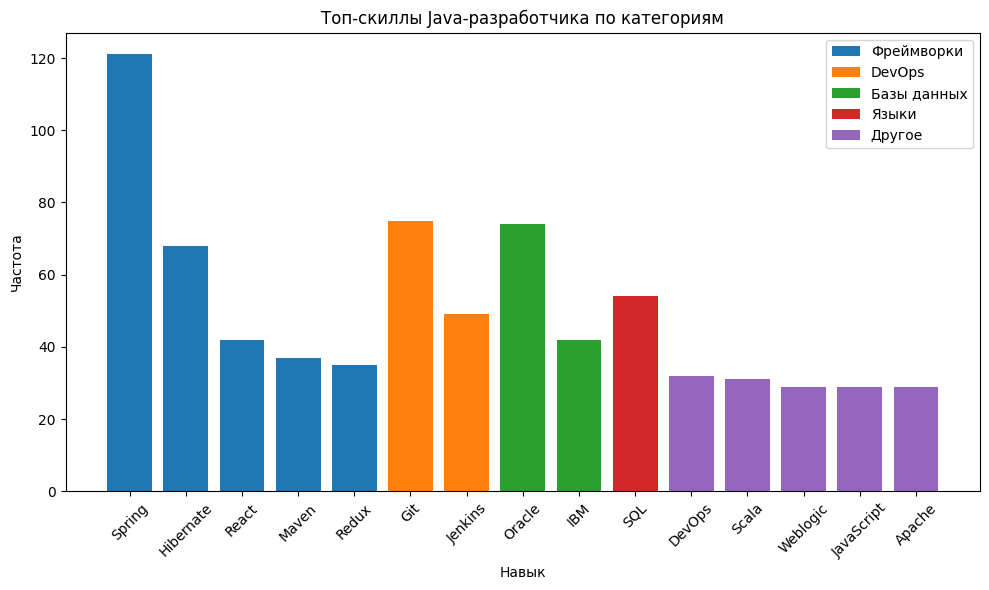

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
from natasha import Segmenter, NewsEmbedding, NewsNERTagger, Doc
import re
from collections import Counter
import matplotlib.pyplot as plt

# === Шаг 1: Загрузка и подготовка ===
df = pd.read_csv("vacancies.csv")
java_vacancies = df[df['name'].str.contains("Java", case=False, na=False)]

java_text = " ".join(
    BeautifulSoup(desc, "html.parser").get_text(separator=" ")
    for desc in java_vacancies['description'].dropna()
)

# === Шаг 2: Извлечение скиллов ===
segmenter = Segmenter()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

doc = Doc(java_text)
doc.segment(segmenter)
doc.tag_ner(ner_tagger)

ner_skills = [span.text for span in doc.spans if span.type == 'ORG']
regex_skills = re.findall(r'\b([A-Z][A-Za-z0-9\+\#\.\-]{2,})\b', java_text)
all_skills = ner_skills + regex_skills

# === Шаг 3: Очистка и подсчёт ===
stopwords = {
    "Сбербанк", "Сбербанка", "Банка", "Россия", "Москва", "РФ",
    "ТК", "Java", "Работа", "Компания", "Требования", "Условия"
}
filtered = [s for s in all_skills if s not in stopwords and s.lower() not in [w.lower() for w in stopwords]]
top_skills = Counter(filtered).most_common(15)
df_skills = pd.DataFrame(top_skills, columns=["Skill", "Frequency"])

# === Шаг 4: Категоризация ===
categories = {
    "Языки": {"Java", "SQL", "Python"},
    "Базы данных": {"Oracle", "PostgreSQL", "MySQL", "MongoDB", "IBM"},
    "Фреймворки": {"Spring", "Hibernate", "Maven", "Junit", "React", "Redux"},
    "DevOps": {"Git", "Jenkins", "Docker", "Kubernetes"}
}

def categorize(skill):
    for category, names in categories.items():
        if skill in names:
            return category
    return "Другое"

df_skills["Category"] = df_skills["Skill"].apply(categorize)

# === Шаг 5: Визуализация ===
plt.figure(figsize=(10, 6))
for category in df_skills["Category"].unique():
    subset = df_skills[df_skills["Category"] == category]
    plt.bar(subset["Skill"], subset["Frequency"], label=category)

plt.title("Топ-скиллы Java-разработчика по категориям")
plt.xlabel("Навык")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### 6.3 Улучшить качество базовой предсказательной CRF-модели на тестовой выборке за счет добавления и модификации признаков

Загрузка данных:

In [ ]:
! wget https://www.dropbox.com/s/iuwsx5pmfhkk0w2/ner_dataset.csv

--2025-05-07 13:36:06--  https://www.dropbox.com/s/iuwsx5pmfhkk0w2/ner_dataset.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/cu61u8g7z5thol0npjj7f/ner_dataset.csv?rlkey=rb70mhtw6yu4r4bu49qoxbjj4 [following]
--2025-05-07 13:36:07--  https://www.dropbox.com/scl/fi/cu61u8g7z5thol0npjj7f/ner_dataset.csv?rlkey=rb70mhtw6yu4r4bu49qoxbjj4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5e3e4c54b9d08bc94cf3896cf4.dl.dropboxusercontent.com/cd/0/inline/CpM66SHydZKSAAmUfywMlduH3wWj5HiAPCnPa_JcFrsO7P9N4p1t0oH75-8PvxCBlf8ekH7gGiaU_KfHQJyHVOQSamwepUCBSqlGYSrBFASdYecxf5BFh-hAllWPuWu9Ik6X1Z0klSnneI3PUXtzTOix/file# [following]
--2025-05-07 13:36:08--  https://uc5e3e4c54b9d08bc94cf3896cf4.dl.dropboxusercontent.com/cd

#### Baseline для 6.3

In [ ]:
import pandas as pd

data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.ffill()


agg_func = lambda s: [[w, p, t] for w, p, t in zip(s["Word"].values.tolist(),
                                                   s["POS"].values.tolist(),
                                                   s["Tag"].values.tolist())]
grouped = data.groupby("Sentence #")[
    ["Word", "POS", "Tag"]
].apply(agg_func).tolist()


X_list = [[word[:2] for word in sentence] for sentence in grouped]
y_list = [[word[2] for word in sentence] for sentence in grouped]

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=1337)

#### Изначальная версия признаков без модификации и добавления

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        ### Your code goes here ###
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            ### Your code goes here ###
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            ### Your code goes here ###
        })
    else:
        features['EOS'] = True

    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

#### C модификацией и добавлением ver_1

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word[:3]': word[:3],
        'word[:2]': word[:2],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'word.contains_hyphen': '-' in word,
        'postag': postag,
        'postag[:2]': postag[:2],
        'word.len': len(word),
    }

    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

X_train = [sent2features(s) for s in data_train]
X_test = [sent2features(s) for s in data_test]

#### с модификацией и добавлением ver_2

In [ ]:
def word_shape(w):
    return ''.join([
        'X' if c.isupper() else
        'x' if c.islower() else
        'd' if c.isdigit() else
        '-' for c in w
    ])

def ensure_crf_safe(features):
    safe = {}
    for k, v in features.items():
        if isinstance(v, (str, bool, float)):
            safe[k] = v
        elif isinstance(v, int):
            safe[k] = str(v)  # CRFsuite не принимает int, но str — да
        else:
            safe[k] = str(v)
    return safe

def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word[:3]': word[:3],
        'word[:2]': word[:2],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'word.contains_hyphen': '-' in word,
        'word.has_special': any(not c.isalnum() for c in word),
        'word.shape': word_shape(word),
        'postag': postag,
        'postag[:2]': postag[:2],
        'word.len': str(len(word)),
    }

    if i > 0:
        word1, postag1 = sent[i-1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i > 1:
        word2, postag2 = sent[i-2]
        features.update({
            '-2:word.lower()': word2.lower(),
            '-2:postag': postag2,
        })

    if i < len(sent) - 1:
        word1, postag1 = sent[i+1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    if i < len(sent) - 2:
        word2, postag2 = sent[i+2]
        features.update({
            '+2:word.lower()': word2.lower(),
            '+2:postag': postag2,
        })

    return ensure_crf_safe(features)

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

# === Создание признаков ===
X_train = [sent2features(s) for s in data_train]
X_test = [sent2features(s) for s in data_test]

# === Обучение CRF ===
import sklearn_crfsuite
from sklearn_crfsuite import metrics

crf = sklearn_crfsuite.CRF(
    algorithm='lb
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
)

crf.fit(X_train, y_train)
y_pred = crf.predict(X_test)


In [ ]:
import sklearn_crfsuite
from sklearn_crfsuite import metrics

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,  # коэффициенты регуляризации
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
)
crf.fit(X_train, y_train)

y_pred = crf.predict(X_test)


In [ ]:
X_train = [sent2features(s) for s in data_train]
X_test = [sent2features(s) for s in data_test]


In [ ]:
print(metrics.flat_classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

       B-art      0.364     0.129     0.190        62
       B-eve      0.619     0.542     0.578        48
       B-geo      0.867     0.907     0.886      7591
       B-gpe      0.968     0.938     0.952      3211
       B-nat      0.542     0.371     0.441        35
       B-org      0.796     0.759     0.777      4018
       B-per      0.854     0.833     0.843      3362
       B-tim      0.939     0.893     0.915      4086
       I-art      0.500     0.190     0.275        58
       I-eve      0.333     0.296     0.314        27
       I-geo      0.843     0.783     0.812      1572
       I-gpe      0.964     0.600     0.740        45
       I-nat      0.600     0.500     0.545         6
       I-org      0.823     0.826     0.824      3372
       I-per      0.860     0.896     0.878      3432
       I-tim      0.871     0.770     0.817      1354
           O      0.992     0.995     0.993    177713

    accuracy              

In [ ]:
# На входе: grouped = list of sentences (list of [word, pos, tag])
from collections import Counter

def has_rare_tag(sentence, rare_tags={'B-art', 'I-eve', 'I-nat'}):
    return any(tag in rare_tags for _, _, tag in sentence)

# Список с дополнительными дубликатами
rare_sentences = [s for s in grouped if has_rare_tag(s)]

# Увеличим выборку редких сущностей в 5 раз
augmented = grouped + rare_sentences * 5

# Преобразуем в X и y
X_list = [[word[:2] for word in sentence] for sentence in augmented]
y_list = [[word[2] for word in sentence] for sentence in augmented]

# Разбиваем как обычно
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=1337)


In [ ]:
X_train = [sent2features(s) for s in data_train]
X_test = [sent2features(s) for s in data_test]


In [ ]:
import sklearn_crfsuite
from sklearn_crfsuite import metrics

crf_2 = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,  # коэффициенты регуляризации
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True,
)
crf_2.fit(X_train, y_train)

y_pred = crf_2.predict(X_test)

In [ ]:
print(metrics.flat_classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

       B-art      0.892     0.944     0.917       462
       B-eve      0.847     0.882     0.864       238
       B-geo      0.860     0.907     0.883      7861
       B-gpe      0.969     0.934     0.951      3406
       B-nat      0.822     0.750     0.784        80
       B-org      0.812     0.747     0.778      4226
       B-per      0.868     0.845     0.856      3628
       B-tim      0.934     0.886     0.909      4453
       I-art      0.893     0.982     0.935       330
       I-eve      0.850     0.976     0.909       290
       I-geo      0.830     0.794     0.812      1613
       I-gpe      0.875     0.549     0.675        51
       I-nat      0.831     0.961     0.891        51
       I-org      0.832     0.813     0.822      3390
       I-per      0.868     0.908     0.887      3654
       I-tim      0.851     0.787     0.818      1506
           O      0.992     0.994     0.993    187918

    accuracy              

#### comprassion of the results between CRF without oversampling and wtith embeddings glove

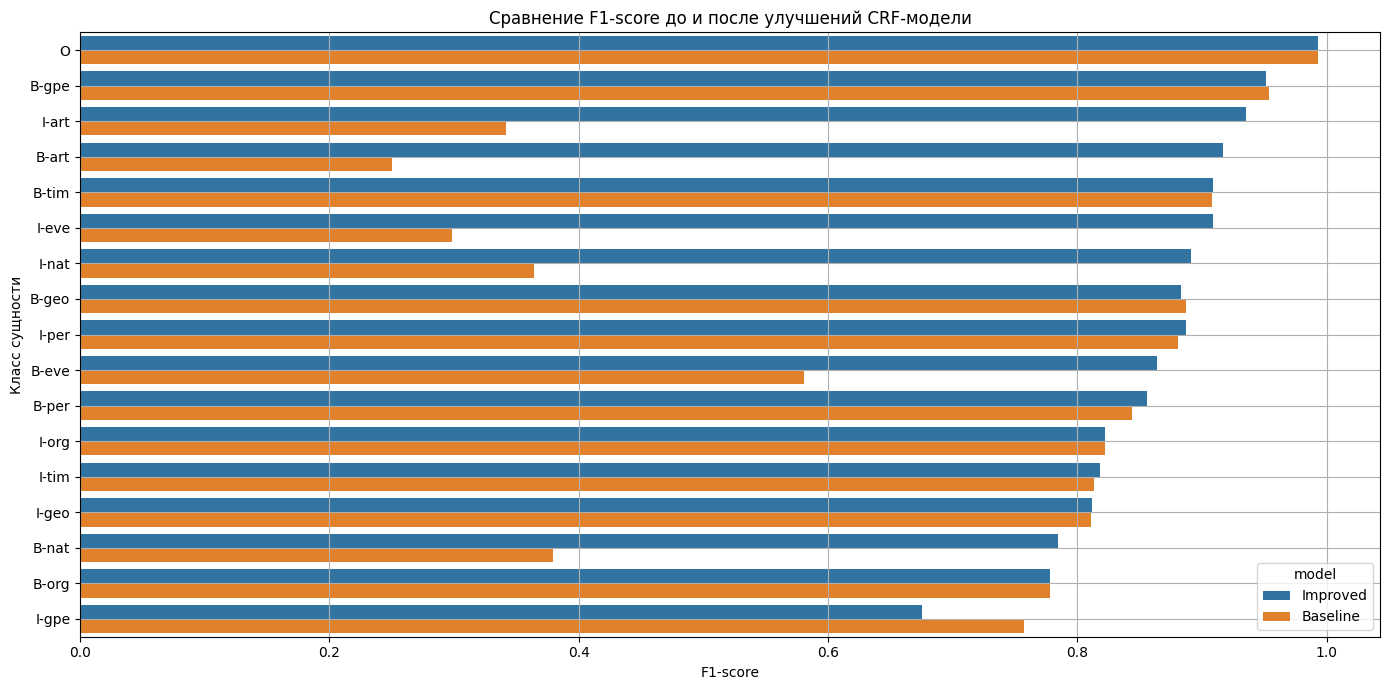

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

baseline_report = {
    "B-art": [0.423, 0.177, 0.250],
    "B-eve": [0.658, 0.521, 0.581],
    "B-geo": [0.867, 0.908, 0.887],
    "B-gpe": [0.969, 0.940, 0.954],
    "B-nat": [0.478, 0.314, 0.379],
    "B-org": [0.795, 0.762, 0.778],
    "B-per": [0.859, 0.829, 0.844],
    "B-tim": [0.933, 0.885, 0.908],
    "I-art": [0.722, 0.224, 0.342],
    "I-eve": [0.350, 0.259, 0.298],
    "I-geo": [0.827, 0.796, 0.811],
    "I-gpe": [0.966, 0.622, 0.757],
    "I-nat": [0.400, 0.333, 0.364],
    "I-org": [0.820, 0.824, 0.822],
    "I-per": [0.862, 0.900, 0.881],
    "I-tim": [0.855, 0.775, 0.813],
    "O": [0.992, 0.994, 0.993],
}

improved_report = {
    "B-art": [0.892, 0.944, 0.917],
    "B-eve": [0.847, 0.882, 0.864],
    "B-geo": [0.860, 0.907, 0.883],
    "B-gpe": [0.969, 0.934, 0.951],
    "B-nat": [0.822, 0.750, 0.784],
    "B-org": [0.812, 0.747, 0.778],
    "B-per": [0.868, 0.845, 0.856],
    "B-tim": [0.934, 0.886, 0.909],
    "I-art": [0.893, 0.982, 0.935],
    "I-eve": [0.850, 0.976, 0.909],
    "I-geo": [0.830, 0.794, 0.812],
    "I-gpe": [0.875, 0.549, 0.675],
    "I-nat": [0.831, 0.961, 0.891],
    "I-org": [0.832, 0.813, 0.822],
    "I-per": [0.868, 0.908, 0.887],
    "I-tim": [0.851, 0.787, 0.818],
    "O": [0.992, 0.994, 0.993],
}

def prepare_dataframe(report, label):
    df = pd.DataFrame(report).T
    df.columns = ["precision", "recall", "f1-score"]
    df["label"] = df.index
    df["model"] = label
    return df

df1 = prepare_dataframe(baseline_report, "Baseline")
df2 = prepare_dataframe(improved_report, "Improved")
df_all = pd.concat([df1, df2])

plt.figure(figsize=(14, 7))
sns.barplot(data=df_all.sort_values("f1-score", ascending=False), x="f1-score", y="label", hue="model")
plt.title("Сравнение F1-score до и после улучшений CRF-модели")
plt.xlabel("F1-score")
plt.ylabel("Класс сущности")
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.4 Улучшить качество базовой предсказательной LSTM-CRF-модели на тестовой выборке за счет подбора предобученных эмбеддингов.

#### Bilstm + glove

In [ ]:
!pip install git+https://github.com/kmkurn/pytorch-crf.git


  Cloning https://github.com/kmkurn/pytorch-crf.git to /tmp/pip-req-build-02h_e9dy
  Running command git clone --filter=blob:none --quiet https://github.com/kmkurn/pytorch-crf.git /tmp/pip-req-build-02h_e9dy
  Resolved https://github.com/kmkurn/pytorch-crf.git to commit 623e3402d00a2728e99d6e8486010d67c754267b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CUDA не доступна")
import numpy as np


def load_glove_embeddings(file_path, word2idx, embedding_dim=100):
    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), embedding_dim))
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            if word in word2idx:
                vector = np.array(parts[1:], dtype=np.float32)
                embeddings[word2idx[word]] = vector
    return torch.tensor(embeddings, dtype=torch.float32)


import pandas as pd
from sklearn.model_selection import train_test_split
from collections import defaultdict

data = pd.read_csv("ner_dataset.csv", encoding="latin1").ffill()


sentences = []
sentence = []
for _, row in data.iterrows():
    if row['Sentence #'] != sentence[-1][0] if sentence else None:
        if sentence:
            sentences.append([x[1:] for x in sentence])
        sentence = [(row['Sentence #'], row['Word'], row['Tag'])]
    else:
        sentence.append((row['Sentence #'], row['Word'], row['Tag']))
if sentence:
    sentences.append([x[1:] for x in sentence])

words = list(set(data["Word"].values))
tags = list(set(data["Tag"].values))

word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["<PAD>"] = 0
word2idx["<UNK>"] = 1

# Путь к GloVe-файлу
glove_path = "glove.6B.100d.txt"  # или другой путь, если ты его разархивировал

# Загрузка эмбеддингов
glove_embeddings = load_glove_embeddings(glove_path, word2idx, embedding_dim=100)

tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {i: t for t, i in tag2idx.items()}

def encode_sentence(sentence, word2idx, tag2idx, max_len=50):
    words = [word2idx.get(w[0], 1) for w in sentence]
    tags = [tag2idx[w[1]] for w in sentence]
    words = words[:max_len] + [0]*(max_len - len(words))
    tags = tags[:max_len] + [tag2idx["O"]] * (max_len - len(tags))
    return words, tags

X, y = zip(*[encode_sentence(s, word2idx, tag2idx) for s in sentences])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import torch.nn as nn
from torchcrf import CRF

class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim, hidden_dim, embeddings=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        if embeddings is not None:
            self.embedding.weight.data.copy_(embeddings)
            self.embedding.weight.requires_grad = True  # фиксировать веса
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers=1,
                            bidirectional=True, batch_first=True)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.crf = CRF(tagset_size, batch_first=True)

    def forward(self, x, mask):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        emissions = self.hidden2tag(lstm_out)
        return emissions

    def loss(self, x, tags, mask):
        emissions = self.forward(x, mask)
        return -self.crf(emissions, tags, mask=mask)

    def predict(self, x, mask):
        emissions = self.forward(x, mask)
        return self.crf.decode(emissions, mask=mask)

# === Инициализация модели ===
model = BiLSTM_CRF(vocab_size=len(word2idx),
                   tagset_size=len(tag2idx),
                   embedding_dim=100,
                   hidden_dim=256,
                   embeddings=glove_embeddings)


model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Обучение ===
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_x, batch_y in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        loss = model.loss(batch_x, batch_y, mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}")

# === Оценка ===
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        preds = model.predict(batch_x, mask)
        for p_seq, t_seq, m in zip(preds, batch_y.tolist(), mask.tolist()):
            valid_len = sum(m)
            all_preds.extend([idx2tag[i] for i in p_seq[:valid_len]])
            all_labels.extend([idx2tag[i] for i in t_seq[:valid_len]])

# === Метрики ===
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_preds, digits=3)
print(report)



True
NVIDIA GeForce RTX 3090


Epoch 1: 100%|██████████████████████████████| 2398/2398 [00:33<00:00, 70.91it/s]


[Epoch 1] Loss: 132271.9191


Epoch 2: 100%|██████████████████████████████| 2398/2398 [00:34<00:00, 70.46it/s]


[Epoch 2] Loss: 53088.4838


Epoch 3: 100%|██████████████████████████████| 2398/2398 [00:33<00:00, 71.41it/s]


[Epoch 3] Loss: 38811.0638


Epoch 4: 100%|██████████████████████████████| 2398/2398 [00:34<00:00, 70.31it/s]


[Epoch 4] Loss: 30645.1401


Epoch 5: 100%|██████████████████████████████| 2398/2398 [00:34<00:00, 70.21it/s]


[Epoch 5] Loss: 24408.9036
              precision    recall  f1-score   support

       B-art      0.343     0.140     0.198        86
       B-eve      0.391     0.305     0.343        59
       B-geo      0.864     0.897     0.880      7664
       B-gpe      0.945     0.936     0.941      3174
       B-nat      0.690     0.400     0.506        50
       B-org      0.766     0.751     0.758      3913
       B-per      0.851     0.825     0.838      3389
       B-tim      0.914     0.888     0.901      4046
       I-art      0.000     0.000     0.000        58
       I-eve      0.333     0.260     0.292        50
       I-geo      0.795     0.808     0.801      1450
       I-gpe      0.781     0.641     0.704        39
       I-nat      1.000     0.500     0.667        12
       I-org      0.794     0.808     0.801      3315
       I-per      0.865     0.882     0.874      3445
       I-tim      0.822     0.768     0.794      1300
           O      0.992     0.992     0.992    176773


In [ ]:
def load_glove_embeddings(file_path, word2idx, embedding_dim=100):
    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), embedding_dim))
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            if word in word2idx:
                vector = np.array(parts[1:], dtype=np.float32)
                embeddings[word2idx[word]] = vector
    return torch.tensor(embeddings, dtype=torch.float32)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import defaultdict

data = pd.read_csv("ner_dataset.csv", encoding="latin1").ffill()


sentences = []
sentence = []
for _, row in data.iterrows():
    if row['Sentence #'] != sentence[-1][0] if sentence else None:
        if sentence:
            sentences.append([x[1:] for x in sentence])
        sentence = [(row['Sentence #'], row['Word'], row['Tag'])]
    else:
        sentence.append((row['Sentence #'], row['Word'], row['Tag']))
if sentence:
    sentences.append([x[1:] for x in sentence])

words = list(set(data["Word"].values))
tags = list(set(data["Tag"].values))

word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["<PAD>"] = 0
word2idx["<UNK>"] = 1

# Путь к GloVe-файлу
glove_path = "/home/r_nazhmutdinov/Desktop/nlp/glove.6B.100d.txt"  # или другой путь, если ты его разархивировал

# Загрузка эмбеддингов
glove_embeddings = load_glove_embeddings(glove_path, word2idx, embedding_dim=100)


tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {i: t for t, i in tag2idx.items()}

def encode_sentence(sentence, word2idx, tag2idx, max_len=50):
    words = [word2idx.get(w[0], 1) for w in sentence]
    tags = [tag2idx[w[1]] for w in sentence]
    words = words[:max_len] + [0]*(max_len - len(words))
    tags = tags[:max_len] + [tag2idx["O"]] * (max_len - len(tags))
    return words, tags

X, y = zip(*[encode_sentence(s, word2idx, tag2idx) for s in sentences])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import torch.nn as nn

from torchcrf import CRF
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim, hidden_dim, embeddings=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        if embeddings is not None:
            self.embedding.weight.data.copy_(embeddings)
            self.embedding.weight.requires_grad = False  # фиксировать веса
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers=1,
                            bidirectional=True, batch_first=True)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.crf = CRF(tagset_size, batch_first=True)

    def forward(self, x, mask):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        emissions = self.hidden2tag(lstm_out)
        return emissions

    def loss(self, x, tags, mask):
        emissions = self.forward(x, mask)
        return -self.crf(emissions, tags, mask=mask)

    def predict(self, x, mask):
        emissions = self.forward(x, mask)
        return self.crf.decode(emissions, mask=mask)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np

# === Гиперпараметры ===
MAX_LEN = 50
BATCH_SIZE = 32
EPOCHS = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Dataset ===
class NERDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = NERDataset(X_train, y_train)
test_dataset = NERDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# === Инициализация модели ===
model = BiLSTM_CRF(vocab_size=len(word2idx),
                   tagset_size=len(tag2idx),
                   embedding_dim=100,
                   hidden_dim=256,
                   embeddings=glove_embeddings)


model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Обучение ===
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_x, batch_y in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        loss = model.loss(batch_x, batch_y, mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}")

# === Оценка ===
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        preds = model.predict(batch_x, mask)
        for p_seq, t_seq, m in zip(preds, batch_y.tolist(), mask.tolist()):
            valid_len = sum(m)
            all_preds.extend([idx2tag[i] for i in p_seq[:valid_len]])
            all_labels.extend([idx2tag[i] for i in t_seq[:valid_len]])

# === Метрики ===
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_preds, digits=3)
print(report)

Epoch 1: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 72.37it/s]


[Epoch 1] Loss: 242204.7295


Epoch 2: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 72.71it/s]


[Epoch 2] Loss: 130008.4877


Epoch 3: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 73.47it/s]


[Epoch 3] Loss: 105917.1621


Epoch 4: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 72.35it/s]


[Epoch 4] Loss: 92329.1129


Epoch 5: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 71.86it/s]


[Epoch 5] Loss: 82487.0844


Epoch 6: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 71.41it/s]


[Epoch 6] Loss: 74708.8079


Epoch 7: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 72.65it/s]


[Epoch 7] Loss: 68501.8716


Epoch 8: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 71.99it/s]


[Epoch 8] Loss: 62874.1653


Epoch 9: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 71.28it/s]


[Epoch 9] Loss: 57496.0037


Epoch 10: 100%|█████████████████████████████| 1199/1199 [00:16<00:00, 72.05it/s]


[Epoch 10] Loss: 52903.2207
              precision    recall  f1-score   support

       B-art      0.000     0.000     0.000        86
       B-eve      0.476     0.169     0.250        59
       B-geo      0.814     0.858     0.836      7664
       B-gpe      0.891     0.830     0.859      3174
       B-nat      0.545     0.120     0.197        50
       B-org      0.695     0.632     0.662      3913
       B-per      0.791     0.749     0.770      3389
       B-tim      0.895     0.878     0.886      4046
       I-art      0.000     0.000     0.000        58
       I-eve      0.200     0.040     0.067        50
       I-geo      0.748     0.747     0.747      1450
       I-gpe      0.714     0.513     0.597        39
       I-nat      0.000     0.000     0.000        12
       I-org      0.720     0.751     0.735      3315
       I-per      0.846     0.830     0.838      3445
       I-tim      0.766     0.778     0.772      1300
           O      0.987     0.991     0.989    176773

#### с заморозокой эмбедингов, и дообучением под задачу

In [ ]:
import torch.nn as nn

from torchcrf import CRF
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim, hidden_dim, embeddings=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        if embeddings is not None:
            self.embedding.weight.data.copy_(embeddings)
            self.embedding.weight.requires_grad = True  # фиксировать веса # изменено на True
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers=1,
                            bidirectional=True, batch_first=True)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.crf = CRF(tagset_size, batch_first=True)

    def forward(self, x, mask):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        emissions = self.hidden2tag(lstm_out)
        return emissions

    def loss(self, x, tags, mask):
        emissions = self.forward(x, mask)
        return -self.crf(emissions, tags, mask=mask)

    def predict(self, x, mask):
        emissions = self.forward(x, mask)
        return self.crf.decode(emissions, mask=mask)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np

# === Гиперпараметры ===
MAX_LEN = 50
BATCH_SIZE = 32
EPOCHS = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Dataset ===
class NERDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = NERDataset(X_train, y_train)
test_dataset = NERDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# === Инициализация модели ===
model = BiLSTM_CRF(vocab_size=len(word2idx),
                   tagset_size=len(tag2idx),
                   embedding_dim=100,
                   hidden_dim=256,
                   embeddings=glove_embeddings)


model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Обучение ===
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_x, batch_y in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        loss = model.loss(batch_x, batch_y, mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}")

# === Оценка ===
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        preds = model.predict(batch_x, mask)
        for p_seq, t_seq, m in zip(preds, batch_y.tolist(), mask.tolist()):
            valid_len = sum(m)
            all_preds.extend([idx2tag[i] for i in p_seq[:valid_len]])
            all_labels.extend([idx2tag[i] for i in t_seq[:valid_len]])

# === Метрики ===
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_preds, digits=3)
print(report)

Epoch 1: 100%|██████████████████████████████| 1199/1199 [00:17<00:00, 70.23it/s]


[Epoch 1] Loss: 170969.5785


Epoch 2: 100%|██████████████████████████████| 1199/1199 [00:17<00:00, 70.25it/s]


[Epoch 2] Loss: 62802.1962


Epoch 3: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 71.07it/s]


[Epoch 3] Loss: 45605.0746


Epoch 4: 100%|██████████████████████████████| 1199/1199 [00:17<00:00, 70.34it/s]


[Epoch 4] Loss: 36281.2971


Epoch 5: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 70.74it/s]


[Epoch 5] Loss: 29804.3123
              precision    recall  f1-score   support

       B-art      0.167     0.128     0.145        86
       B-eve      0.349     0.254     0.294        59
       B-geo      0.859     0.901     0.879      7664
       B-gpe      0.944     0.938     0.941      3174
       B-nat      0.611     0.220     0.324        50
       B-org      0.769     0.745     0.757      3913
       B-per      0.867     0.811     0.838      3389
       B-tim      0.915     0.887     0.900      4046
       I-art      0.041     0.052     0.045        58
       I-eve      0.220     0.180     0.198        50
       I-geo      0.821     0.795     0.808      1450
       I-gpe      0.833     0.641     0.725        39
       I-nat      0.333     0.083     0.133        12
       I-org      0.820     0.791     0.805      3315
       I-per      0.857     0.900     0.878      3445
       I-tim      0.832     0.745     0.786      1300
           O      0.991     0.993     0.992    176773


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np

# === Гиперпараметры ===
MAX_LEN = 50
BATCH_SIZE = 32
EPOCHS = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Dataset ===
class NERDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = NERDataset(X_train, y_train)
test_dataset = NERDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# === Инициализация модели ===
model = BiLSTM_CRF(vocab_size=len(word2idx),
                   tagset_size=len(tag2idx),
                   embedding_dim=100,
                   hidden_dim=256,
                   embeddings=glove_embeddings)


model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Обучение ===
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_x, batch_y in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        loss = model.loss(batch_x, batch_y, mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}")

# === Оценка ===
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        preds = model.predict(batch_x, mask)
        for p_seq, t_seq, m in zip(preds, batch_y.tolist(), mask.tolist()):
            valid_len = sum(m)
            all_preds.extend([idx2tag[i] for i in p_seq[:valid_len]])
            all_labels.extend([idx2tag[i] for i in t_seq[:valid_len]])

# === Метрики ===
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_preds, digits=3)
print(report)

Epoch 1: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 70.86it/s]


[Epoch 1] Loss: 173400.3551


Epoch 2: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 70.60it/s]


[Epoch 2] Loss: 62475.7163


Epoch 3: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 70.82it/s]


[Epoch 3] Loss: 45267.3695


Epoch 4: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 70.77it/s]


[Epoch 4] Loss: 36105.1106


Epoch 5: 100%|██████████████████████████████| 1199/1199 [00:17<00:00, 69.29it/s]


[Epoch 5] Loss: 30006.6600


Epoch 6: 100%|██████████████████████████████| 1199/1199 [00:17<00:00, 70.33it/s]


[Epoch 6] Loss: 24655.8824


Epoch 7: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 70.96it/s]


[Epoch 7] Loss: 20134.6489


Epoch 8: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 70.67it/s]


[Epoch 8] Loss: 16188.4386


Epoch 9: 100%|██████████████████████████████| 1199/1199 [00:16<00:00, 70.80it/s]


[Epoch 9] Loss: 12757.1005


Epoch 10: 100%|█████████████████████████████| 1199/1199 [00:16<00:00, 71.81it/s]


[Epoch 10] Loss: 10041.4951
              precision    recall  f1-score   support

       B-art      0.273     0.140     0.185        86
       B-eve      0.362     0.288     0.321        59
       B-geo      0.875     0.852     0.863      7664
       B-gpe      0.937     0.925     0.931      3174
       B-nat      0.455     0.300     0.361        50
       B-org      0.726     0.735     0.731      3913
       B-per      0.831     0.799     0.815      3389
       B-tim      0.887     0.884     0.886      4046
       I-art      0.143     0.052     0.076        58
       I-eve      0.280     0.140     0.187        50
       I-geo      0.797     0.778     0.787      1450
       I-gpe      0.781     0.641     0.704        39
       I-nat      0.167     0.083     0.111        12
       I-org      0.762     0.803     0.782      3315
       I-per      0.888     0.837     0.862      3445
       I-tim      0.750     0.795     0.772      1300
           O      0.989     0.992     0.991    176773

#### BILSTM + OVERSAMPLING+DROPOUT + fasttext

In [ ]:
# === Улучшенный вариант модели BiLSTM-CRF с FastText и oversampling ===
import torch
import torch.nn as nn
from torchcrf import CRF
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import fasttext
import fasttext.util

# === Гиперпараметры ===
MAX_LEN = 50
EMBEDDING_DIM = 300
HIDDEN_DIM = 256
BATCH_SIZE = 32
EPOCHS = 7
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Подгрузка датасета и предварительная обработка ===
data = pd.read_csv("ner_dataset.csv", encoding="latin1").ffill()

sentences = []
sentence = []
for _, row in data.iterrows():
    if row['Sentence #'] != sentence[-1][0] if sentence else None:
        if sentence:
            sentences.append([x[1:] for x in sentence])
        sentence = [(row['Sentence #'], row['Word'], row['Tag'])]
    else:
        sentence.append((row['Sentence #'], row['Word'], row['Tag']))
if sentence:
    sentences.append([x[1:] for x in sentence])

words = list(set(data["Word"].values))
tags = list(set(data["Tag"].values))

word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["<PAD>"] = 0
word2idx["<UNK>"] = 1

tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {i: t for t, i in tag2idx.items()}

# === Oversampling предложений с редкими сущностями ===
rare_labels = {'B-art', 'I-art', 'B-eve', 'I-eve', 'B-nat', 'I-nat'}
augmented = [s for s in sentences if any(t in rare_labels for _, t in s)]
sentences.extend(augmented * 10)

# === FastText эмбеддинги ===
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

embedding_matrix = np.random.uniform(-0.25, 0.25, (len(word2idx), EMBEDDING_DIM))
for word, idx in word2idx.items():
    if word in ft:
        embedding_matrix[idx] = ft.get_word_vector(word)
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float32)

# === Подготовка данных ===
def encode_sentence(sentence, word2idx, tag2idx, max_len=MAX_LEN):
    words = [word2idx.get(w[0], 1) for w in sentence]
    tags = [tag2idx[w[1]] for w in sentence]
    words = words[:max_len] + [0]*(max_len - len(words))
    tags = tags[:max_len] + [tag2idx["O"]] * (max_len - len(tags))
    return words, tags

X, y = zip(*[encode_sentence(s, word2idx, tag2idx) for s in sentences])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class NERDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(NERDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(NERDataset(X_test, y_test), batch_size=BATCH_SIZE)

# === Модель ===
class BiLSTM_CRF(nn.Module):
    def __init__(self, vocab_size, tagset_size, embedding_dim, hidden_dim, embeddings=None):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        if embeddings is not None:
            self.embedding.weight.data.copy_(embeddings)
            self.embedding.weight.requires_grad = True
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers=1,
                            bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.crf = CRF(tagset_size, batch_first=True)

    def forward(self, x, mask):
        embeds = self.embedding(x)
        lstm_out, _ = self.lstm(embeds)
        lstm_out = self.dropout(lstm_out)
        emissions = self.hidden2tag(lstm_out)
        return emissions

    def loss(self, x, tags, mask):
        emissions = self.forward(x, mask)
        return -self.crf(emissions, tags, mask=mask)

    def predict(self, x, mask):
        emissions = self.forward(x, mask)
        return self.crf.decode(emissions, mask=mask)

# === Обучение ===
model = BiLSTM_CRF(len(word2idx), len(tag2idx), EMBEDDING_DIM, HIDDEN_DIM, embedding_matrix).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_x, batch_y in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        loss = model.loss(batch_x, batch_y, mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}")

# === Оценка ===
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        mask = batch_x != 0
        preds = model.predict(batch_x, mask)
        for p_seq, t_seq, m in zip(preds, batch_y.tolist(), mask.tolist()):
            valid_len = sum(m)
            all_preds.extend([idx2tag[i] for i in p_seq[:valid_len]])
            all_labels.extend([idx2tag[i] for i in t_seq[:valid_len]])

from sklearn.metrics import classification_report
print(classification_report(all_labels, all_preds, digits=3))


 (0.54%) [>                                                  ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (3.05%) [=>                                                 ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (5.75%) [==>                                                ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (8.43%) [====>                                              ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (10.99%) [=====>                                             ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (13.43%) [======>                                            ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (15.77%) [=======>                                           ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (16.04%) [========>                                          ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (19.15%) [=========>                                         ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (21.32%) [==========>                                        ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (21.54%) [==========>                                        ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (23.94%) [===========>                                       ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (26.67%) [=============>                                     ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (29.35%) [==============>                                    ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (31.38%) [===============>                                   ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (33.55%) [================>                                  ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (33.89%) [================>                                  ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (36.14%) [==================>                                ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (38.27%) [===================>                               ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (40.68%) [====================>                              ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (42.53%) [=====================>                             ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (44.68%) [======================>                            ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (44.97%) [======================>                            ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (47.46%) [=======================>                           ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (49.71%) [========================>                          ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (49.97%) [========================>                          ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (51.84%) [=========================>                         ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (52.13%) [==========================>                        ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (54.48%) [===========================>                       ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (54.89%) [===========================>                       ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (57.43%) [============================>                      ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (57.76%) [============================>                      ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (60.26%) [==============================>                    ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (62.88%) [===============================>                   ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (65.72%) [================================>                  ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (68.40%) [==================================>                ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (70.57%) [===================================>               ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (73.02%) [====================================>              ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (75.56%) [=====================================>             ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (77.92%) [======================================>            ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (80.50%) [========================================>          ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (82.86%) [=========================================>         ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (85.38%) [==========================================>        ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (87.69%) [===========================================>       ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (88.13%) [============================================>      ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (90.21%) [=============================================>     ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (90.59%) [=============================================>     ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (92.89%) [==============================================>    ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (93.30%) [==============================================>    ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (95.32%) [===============================================>   ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (95.70%) [===============================================>   ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (97.92%) [================================================>  ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (99.77%) [=================================================> ]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 (100.00%) [==================================================>]


Epoch 1: 100%|██████████████████████████████| 1399/1399 [00:21<00:00, 66.58it/s]


[Epoch 1] Loss: 197302.1712


Epoch 2: 100%|██████████████████████████████| 1399/1399 [00:20<00:00, 67.23it/s]


[Epoch 2] Loss: 64189.2558


Epoch 3: 100%|██████████████████████████████| 1399/1399 [00:20<00:00, 66.80it/s]


[Epoch 3] Loss: 44487.8664


Epoch 4: 100%|██████████████████████████████| 1399/1399 [00:20<00:00, 67.15it/s]


[Epoch 4] Loss: 34264.8339


Epoch 5: 100%|██████████████████████████████| 1399/1399 [00:20<00:00, 67.38it/s]


[Epoch 5] Loss: 27230.7745


Epoch 6: 100%|██████████████████████████████| 1399/1399 [00:20<00:00, 67.26it/s]


[Epoch 6] Loss: 22135.7511


Epoch 7: 100%|██████████████████████████████| 1399/1399 [00:20<00:00, 67.62it/s]


[Epoch 7] Loss: 17745.4061
              precision    recall  f1-score   support

       B-art      0.928     1.000     0.963       875
       B-eve      0.964     0.997     0.980       676
       B-geo      0.894     0.887     0.891      8765
       B-gpe      0.952     0.944     0.948      3631
       B-nat      0.981     0.987     0.984       463
       B-org      0.806     0.765     0.785      4698
       B-per      0.865     0.860     0.862      3963
       B-tim      0.926     0.899     0.912      4812
       I-art      0.944     1.000     0.971       674
       I-eve      0.973     1.000     0.987       551
       I-geo      0.871     0.805     0.837      1755
       I-gpe      0.622     0.683     0.651        41
       I-nat      0.992     0.976     0.984       126
       I-org      0.833     0.815     0.824      3996
       I-per      0.877     0.892     0.885      3962
       I-tim      0.864     0.809     0.836      1715
           O      0.991     0.994     0.993    207553


#### comparison of the results

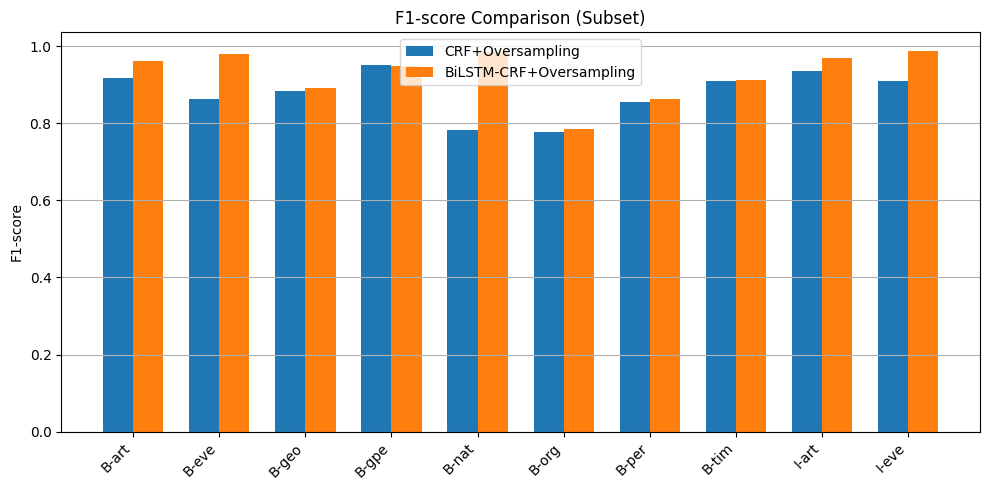

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org', 'B-per', 'B-tim', 'I-art', 'I-eve']
crf_f1 = [0.917, 0.864, 0.883, 0.951, 0.784, 0.778, 0.856, 0.909, 0.935, 0.909]
bilstm_f1 = [0.963, 0.980, 0.891, 0.948, 0.984, 0.785, 0.862, 0.912, 0.971, 0.987]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, crf_f1, width, label='CRF+Oversampling')
plt.bar(x + width/2, bilstm_f1, width, label='BiLSTM-CRF+Oversampling')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.ylabel('F1-score')
plt.title('F1-score Comparison (Subset)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


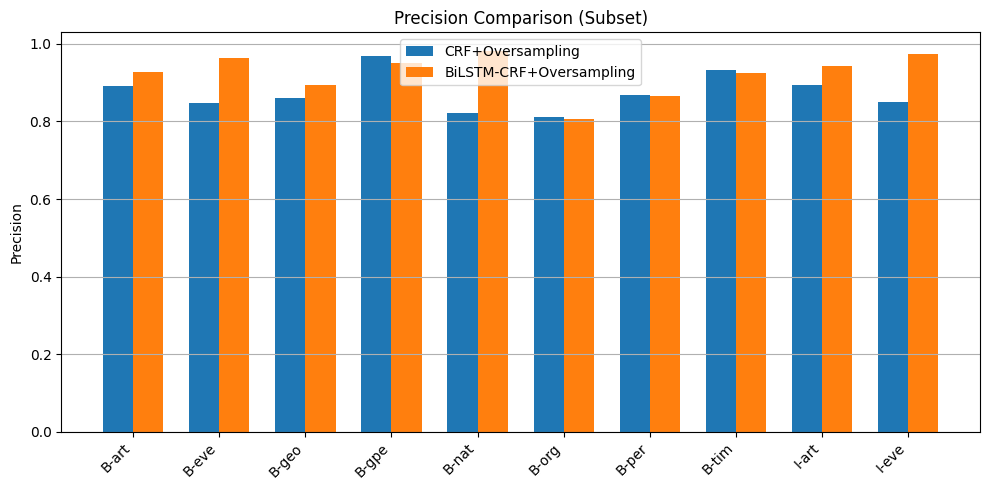

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org', 'B-per', 'B-tim', 'I-art', 'I-eve']

# Precision
crf_prec = [0.892, 0.847, 0.860, 0.969, 0.822, 0.812, 0.868, 0.934, 0.893, 0.850]
bilstm_prec = [0.928, 0.964, 0.894, 0.952, 0.981, 0.806, 0.865, 0.926, 0.944, 0.973]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, crf_prec, width, label='CRF+Oversampling')
plt.bar(x + width/2, bilstm_prec, width, label='BiLSTM-CRF+Oversampling')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.ylabel('Precision')
plt.title('Precision Comparison (Subset)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()




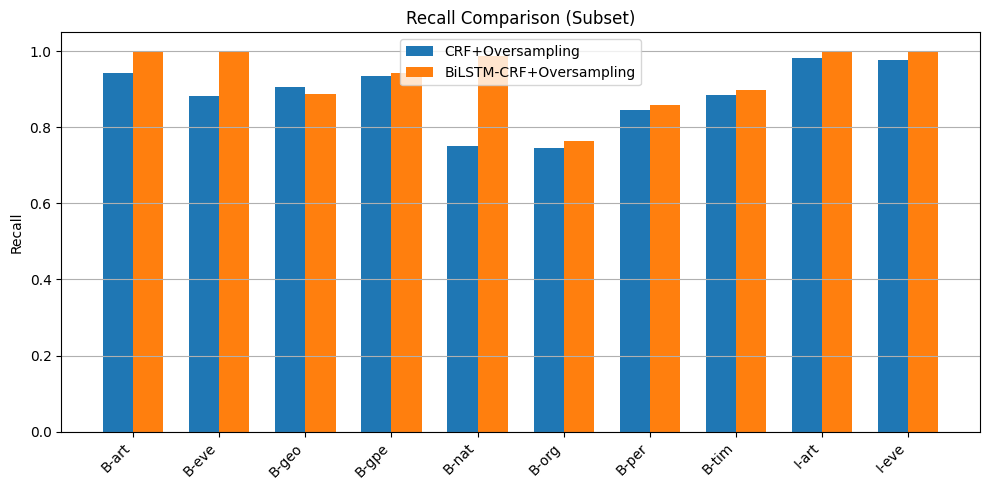

In [ ]:
# Recall
crf_recall = [0.944, 0.882, 0.907, 0.934, 0.750, 0.747, 0.845, 0.886, 0.982, 0.976]
bilstm_recall = [1.000, 0.997, 0.887, 0.944, 0.987, 0.765, 0.860, 0.899, 1.000, 1.000]

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, crf_recall, width, label='CRF+Oversampling')
plt.bar(x + width/2, bilstm_recall, width, label='BiLSTM-CRF+Oversampling')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.ylabel('Recall')
plt.title('Recall Comparison (Subset)')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### CHECK DEVICE AND MODULE CRF

In [ ]:
from torchcrf import CRF
crf = CRF(num_tags=5, batch_first=True)
print("CRF инициализирован корректно.")


CRF инициализирован корректно.


In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)
print(torch.cuda.is_available())



2.6.0+cu124
12.4
True
True


In [ ]:
from torchcrf import CRF
help(CRF)


Help on class CRF in module torchcrf:

class CRF(torch.nn.modules.module.Module)
 |  CRF(num_tags: int, batch_first: bool = False) -> None
 |  
 |  Conditional random field.
 |  
 |  This module implements a conditional random field [LMP01]_. The forward computation
 |  of this class computes the log likelihood of the given sequence of tags and
 |  emission score tensor. This class also has `~CRF.decode` method which finds
 |  the best tag sequence given an emission score tensor using `Viterbi algorithm`_.
 |  
 |  Args:
 |      num_tags: Number of tags.
 |      batch_first: Whether the first dimension corresponds to the size of a minibatch.
 |  
 |  Attributes:
 |      start_transitions (`~torch.nn.Parameter`): Start transition score tensor of size
 |          ``(num_tags,)``.
 |      end_transitions (`~torch.nn.Parameter`): End transition score tensor of size
 |          ``(num_tags,)``.
 |      transitions (`~torch.nn.Parameter`): Transition score tensor of size
 |          ``(num_t

# 7. Классификатор тональности

- В качестве решения любого задания <b>не принимается</b> модель с качеством менее 62.00% макроусредненной F1 на тесте.
- <b>Можно</b> улучшать модели сверх предложенных условий: <b>добавлять свои признаки к указанным в задании</b>, изменять способ классификации и подбирать гиперпараметры.
- Тестовые данные можно использовать только при оценке моделей.


Данные для обучения моделей:

In [ ]:
! wget https://www.dropbox.com/s/t1gs701zvqaxqnk/rusentiment_random_posts.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
import urllib.request

url = "https://www.dropbox.com/s/t1gs701zvqaxqnk/rusentiment_random_posts.csv?dl=1"
urllib.request.urlretrieve(url, "rusentiment_random_posts.csv")


('rusentiment_random_posts.csv', <http.client.HTTPMessage at 0x22eb51fdbd0>)

Данные для тестирования моделей:

In [ ]:
! wget https://www.dropbox.com/s/gr4z1x39y1j6dtx/rusentiment_test.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
import urllib.request

url = "https://www.dropbox.com/s/gr4z1x39y1j6dtx/rusentiment_test.csv?dl=1"
urllib.request.urlretrieve(url, "rusentiment_test.csv")

('rusentiment_test_.csv', <http.client.HTTPMessage at 0x22eb51fc4c0>)

В заданиях 7.1 - 7.3 заготовка кода есть в презентации.

#### 7.4 Обучить fasttext-классификатор, сравнить качество классификации с предобученными эмбеддингами и обученными с нуля при классификации

In [ ]:
import fasttext

### Your code goes here ###
# model = fasttext.train_supervised(...
# model.test(...
###########################

### 0 подготовка

In [ ]:
import pandas as pd, re, pymorphy2, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
morph = pymorphy2.MorphAnalyzer()

df_train = pd.read_csv('rusentiment_random_posts.csv')
df_test  = pd.read_csv('rusentiment_test.csv')          # **использовать ТОЛЬКО для финальной оценки!**

def clean(text):
    text = re.sub(r'http\S+|\W+', ' ', str(text).lower())
    return re.sub(r'\s+', ' ', text).strip()

def lemmatize(text):
    return ' '.join(morph.parse(t)[0].normal_form for t in text.split())

df_train['lemmas'] = df_train['text'].map(clean).map(lemmatize)


In [ ]:
df = pd.read_csv(r"rusentiment_random_posts.csv")


In [ ]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import re, pandas as pd, numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk; nltk.download('stopwords')

ru_stop = stopwords.words("russian")          # список стоп-слов

def clean(txt: str) -> str:
    txt = re.sub(r"http\S+|\d+", " ", str(txt).lower())
    txt = txt.replace("ё", "е")               # ←  объединяем ё → е
    return re.sub(r"\W+", " ", txt).strip()

# читаем корпус
df = pd.read_csv("rusentiment_test.csv")
corpus = df["text"].map(clean).tolist()

# TF-IDF (1–2-граммы, без русских стоп-слов)
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=100_000,
    min_df=2,
    sublinear_tf=True,
    stop_words=ru_stop
)
X = tfidf.fit_transform(corpus)

# топ-20 признаков
avg = np.asarray(X.mean(axis=0)).ravel()
idx = avg.argsort()[::-1][:20]

top20 = pd.DataFrame({
    "term": tfidf.get_feature_names_out()[idx],
    "avg_tf_idf": avg[idx]
})
print(top20.to_markdown(index=False))


| term          |   avg_tf_idf |
|:--------------|-------------:|
| днем          |   0.0225197  |
| это           |   0.0191297  |
| рождения      |   0.0176681  |
| днем рождения |   0.0168631  |
| тебе          |   0.0130848  |
| спасибо       |   0.00916209 |
| сегодня       |   0.00907512 |
| люблю         |   0.00813868 |
| просто        |   0.00728347 |
| день          |   0.00614237 |
| очень         |   0.00613917 |
| всем          |   0.00551878 |
| кого          |   0.00497317 |
| хочу          |   0.00497047 |
| привет        |   0.00494454 |
| жизни         |   0.00467132 |
| новый         |   0.00435437 |
| жизнь         |   0.00413307 |
| завтра        |   0.00400164 |
| буду          |   0.00394678 |


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruslan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re, pandas as pd, numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk; nltk.download('stopwords')

ru_stop = stopwords.words("russian")          # список стоп-слов

def clean(txt: str) -> str:
    txt = re.sub(r"http\S+|\d+", " ", str(txt).lower())
    txt = txt.replace("ё", "е")               # ←  объединяем ё → е
    return re.sub(r"\W+", " ", txt).strip()

# читаем корпус
df = pd.read_csv("rusentiment_random_posts.csv")
corpus = df["text"].map(clean).tolist()

# TF-IDF (1–2-граммы, без русских стоп-слов)
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=100_000,
    min_df=2,
    sublinear_tf=True,
    stop_words=ru_stop
)
X = tfidf.fit_transform(corpus)

# топ-20 признаков
avg = np.asarray(X.mean(axis=0)).ravel()
idx = avg.argsort()[::-1][:20]

top20 = pd.DataFrame({
    "term": tfidf.get_feature_names_out()[idx],
    "avg_tf_idf": avg[idx]
})
print(top20.to_markdown(index=False))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruslan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


| term          |   avg_tf_idf |
|:--------------|-------------:|
| днем          |   0.0176816  |
| рождения      |   0.0146228  |
| днем рождения |   0.0141717  |
| это           |   0.0133668  |
| тебе          |   0.0107614  |
| люблю         |   0.00869376 |
| очень         |   0.00539295 |
| спасибо       |   0.00523682 |
| день          |   0.0050461  |
| сегодня       |   0.0050029  |
| хочу          |   0.00491589 |
| просто        |   0.00467867 |
| всем          |   0.00434581 |
| привет        |   0.00423999 |
| поздравляю    |   0.00400155 |
| самого        |   0.00345362 |
| праздником    |   0.00327341 |
| id            |   0.00306965 |
| жизни         |   0.00303366 |
| почему        |   0.00293251 |


### 1 . Добавляем признаки из внешнего словаря тональностей (RuSentiLex)

In [ ]:
import urllib.request

url = 'https://www.labinform.ru/pub/rusentilex/rusentilex_2017.txt'
save_path = 'rusentilex_2017.txt'

urllib.request.urlretrieve(url, save_path)
print('Словарь скачан и сохранён в rusentilex_2017.txt')



Словарь скачан и сохранён в rusentilex_2017.txt


In [ ]:
lexicon = {}

with open("rusentilex_2017.txt", encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith('!'):
            continue  # пропускаем комментарии и пустые строки

        parts = [p.strip() for p in line.split(',')]
        if len(parts) < 4:
            continue  # пропускаем повреждённые строки

        lemma = parts[2].lower()
        polarity = parts[3].lower()

        # игнорируем амбивалентные (positive/negative) — чтобы не вносить шум
        if polarity in ['positive', 'negative', 'neutral']:
            lexicon[lemma] = polarity


In [ ]:
print(lexicon['аборт'])        # 'negative'
print(lexicon['абракадабра'])  # 'negative'
print(lexicon.get('абзац'))    # None — если его нет


negative
negative
None


In [ ]:
def lexicon_feats(text):
    pos = neg = 0
    for w in text.split():
        s = lexicon.get(w)
        if s == 'positive': pos += 1
        elif s == 'negative': neg += 1
    total = len(text.split()) or 1
    return pd.Series({'pos_cnt':pos, 'neg_cnt':neg,
                      'pos_ratio':pos/total, 'neg_ratio':neg/total})

lex_feats = df_train['lemmas'].apply(lexicon_feats)

In [ ]:
lex_feats.head()

,pos_cnt,neg_cnt,pos_ratio,neg_ratio
0,0.0,1.0,0.000000,0.083333
1,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000
3,1.0,0.0,0.142857,0.000000
4,0.0,0.0,0.000000,0.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.sparse import hstack

tfidf = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1,3),
    max_features=60000,
    min_df=2,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(df_train['lemmas'])
X_test_tfidf = tfidf.transform(df_test['lemmas'])

# нормализация лексиконных признаков
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_lex = scaler.fit_transform(lex_feats_train)
X_test_lex  = scaler.transform(lex_feats_test)

# объединение
from scipy.sparse import hstack
X_train_all = hstack([X_train_tfidf, X_train_lex])
X_test_all  = hstack([X_test_tfidf,  X_test_lex])
y_train = df_train['label']
y_test = df_test['label']

# LogisticRegression с более мощной регуляризацией
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=7.0, class_weight='balanced', solver='liblinear', max_iter=1200)
clf.fit(X_train_all, y_train)
y_pred = clf.predict(X_test_all)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')

✅ macro-F1 (TF-IDF + lexicon, усилено 2): 0.6309


In [ ]:
print(f"✅ macro-F1 (TF-IDF + lexicon, усилено 2): {(f1):.4f}")

✅ macro-F1 (TF-IDF + lexicon, усилено 2): 0.6301


### 2 . Улучшить качество базовой предсказательной модели на тестовой выборке за счет добавления и модификации признаков.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression

word_v = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features=40_000,
                         sublinear_tf=True, min_df=3)
char_v = TfidfVectorizer(analyzer='char', ngram_range=(3,5), min_df=5)

X_word = word_v.fit_transform(df_train['lemmas'])
X_char = char_v.fit_transform(df_train['lemmas'])
X      = hstack([X_word, X_char, lex_feats.values])

X_tr, X_val, y_tr, y_val = train_test_split(X, df_train['label'],
                                            test_size=0.2, random_state=42, stratify=df_train['label'])

clf = LogisticRegression(solver='liblinear', C=4, class_weight='balanced', max_iter=300)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_val)
print('macro-F1 =', f1_score(y_val, y_pred, average='macro'))


macro-F1 = 0.6261881470513503


### 3 .Сравнить качество классификации на леммах и подтокенах.

In [ ]:
!pip install Cython


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.7 MB 2.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 2.7 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.7 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import Cython
print(Cython.__version__)
import youtokentome as yttm
print(yttm.__version__)


3.1.0


ModuleNotFoundError: No module named 'youtokentome'

In [ ]:
import sys
print(sys.executable)


D:\I_NLP\i_nlp\Scripts\python.exe


In [ ]:
!pip install sentencepiece


  Using cached sentencepiece-0.2.0-cp310-cp310-win_amd64.whl.metadata (8.3 kB)
Using cached sentencepiece-0.2.0-cp310-cp310-win_amd64.whl (991 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sentencepiece as spm

# Сохраняем корпус лемм в текстовый файл
with open("corpus_lemmas.txt", "w", encoding="utf-8") as f:
    for line in df_train['lemmas']:
        f.write(line + "\n")

# Обучаем BPE-модель
spm.SentencePieceTrainer.train(
    input='corpus_lemmas.txt',
    model_prefix='bpe_lemmas',
    vocab_size=16000,
    model_type='bpe',
    character_coverage=1.0
)


In [ ]:
# Загружаем модель
import sentencepiece as spm
sp = spm.SentencePieceProcessor(model_file='bpe_lemmas.model')

# Применяем BPE к каждому тексту
df_train['bpe_lemmas'] = df_train['lemmas'].apply(lambda x: ' '.join(sp.encode(x, out_type=str)))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word')
X_bpe = vectorizer.fit_transform(df_train['bpe_lemmas'])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Обучающая выборка
X_lemmas = df_train['lemmas']
X_bpe    = df_train['bpe_lemmas']
y        = df_train['label']

# Разделим на train/val
X_lem_tr, X_lem_val, y_lem_tr, y_lem_val = train_test_split(X_lemmas, y, test_size=0.2, random_state=42, stratify=y)
X_bpe_tr, X_bpe_val, y_bpe_tr, y_bpe_val = train_test_split(X_bpe,    y, test_size=0.2, random_state=42, stratify=y)

# Векторизаторы (анализируем слова)
tfidf_lemmas = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=30000)
tfidf_bpe    = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=30000)

X_lem_tr_vec = tfidf_lemmas.fit_transform(X_lem_tr)
X_lem_val_vec = tfidf_lemmas.transform(X_lem_val)

X_bpe_tr_vec = tfidf_bpe.fit_transform(X_bpe_tr)
X_bpe_val_vec = tfidf_bpe.transform(X_bpe_val)

# Классификатор
clf_lem = LogisticRegression(max_iter=300, class_weight='balanced')
clf_bpe = LogisticRegression(max_iter=300, class_weight='balanced')

# Обучение
clf_lem.fit(X_lem_tr_vec, y_lem_tr)
clf_bpe.fit(X_bpe_tr_vec, y_bpe_tr)

# Предсказание и оценка
y_lem_pred = clf_lem.predict(X_lem_val_vec)
y_bpe_pred = clf_bpe.predict(X_bpe_val_vec)

f1_lem = f1_score(y_lem_val, y_lem_pred, average='macro')
f1_bpe = f1_score(y_bpe_val, y_bpe_pred, average='macro')

print(f"F1 на леммах:       {f1_lem:.4f}")
print(f"F1 на подтокенах BPE: {f1_bpe:.4f}")


F1 на леммах:       0.5861
F1 на подтокенах BPE: 0.5960


In [ ]:
df_test = pd.read_csv("rusentiment_test.csv")
df_test['lemmas'] = df_test['text'].map(clean).map(lemmatize)
df_test['bpe_lemmas'] = df_test['lemmas'].apply(lambda x: ' '.join(sp.encode(x, out_type=str)))


In [ ]:
# Повторим обучение на всей train-части (без val)
X_train_text = df_train['lemmas']
y_train = df_train['label']

# Признаки lexicon
lex_feats_train = df_train['lemmas'].apply(lexicon_feats)
lex_feats_test = df_test['lemmas'].apply(lexicon_feats)

# TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(df_test['lemmas'])

# Объединение всех признаков
from scipy.sparse import hstack
X_train_final = hstack([X_train_tfidf, lex_feats_train.values])
X_test_final = hstack([X_test_tfidf, lex_feats_test.values])

# Обучение модели
clf = LogisticRegression(max_iter=300, class_weight='balanced')
clf.fit(X_train_final, y_train)

# Предсказание
y_test_pred = clf.predict(X_test_final)

# Оценка качества
from sklearn.metrics import f1_score
print("macro-F1 на тесте =", f1_score(df_test['label'], y_test_pred, average='macro'))


macro-F1 на тесте = 0.58601557344416


In [ ]:
# word TF-IDF
tfidf_word = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_features=30000)
X_train_word = tfidf_word.fit_transform(df_train['lemmas'])
X_test_word  = tfidf_word.transform(df_test['lemmas'])

# char TF-IDF (на леммах)
tfidf_char = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,5), min_df=3)
X_train_char = tfidf_char.fit_transform(df_train['lemmas'])
X_test_char  = tfidf_char.transform(df_test['lemmas'])

# объединение всех признаков: word + char + lexicon
from scipy.sparse import hstack

X_train_all = hstack([X_train_word, X_train_char, lex_feats_train.values])
X_test_all  = hstack([X_test_word,  X_test_char,  lex_feats_test.values])


In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=1.0, class_weight='balanced', max_iter=1000)
clf.fit(X_train_all, y_train)
y_test_pred = clf.predict(X_test_all)

from sklearn.metrics import f1_score
print("macro-F1 на тесте =", f1_score(df_test['label'], y_test_pred, average='macro'))


macro-F1 на тесте = 0.6103309883775418


D:\I_NLP\i_nlp\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
def lexicon_feats(text):
    pos = neg = neu = 0
    for w in text.split():
        s = lexicon.get(w)
        if s == 'positive': pos += 1
        elif s == 'negative': neg += 1
        elif s == 'neutral':  neu += 1
    total = len(text.split()) or 1
    return pd.Series({
        'pos_cnt': pos, 'neg_cnt': neg, 'neu_cnt': neu,
        'pos_ratio': pos/total, 'neg_ratio': neg/total, 'neu_ratio': neu/total
    })


In [ ]:
# --- 1. Импорт
import pandas as pd, re, sentencepiece as spm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import pymorphy2

# --- 2. Предобработка
morph = pymorphy2.MorphAnalyzer()

def clean(text):
    text = re.sub(r'http\S+|\W+', ' ', str(text).lower())
    return re.sub(r'\s+', ' ', text).strip()

def lemmatize(text):
    return ' '.join(morph.parse(t)[0].normal_form for t in text.split())

df_train = pd.read_csv('rusentiment_random_posts.csv')
df_test = pd.read_csv('rusentiment_test.csv')

df_train['lemmas'] = df_train['text'].map(clean).map(lemmatize)
df_test['lemmas']  = df_test['text'].map(clean).map(lemmatize)

# --- 3. BPE через sentencepiece
with open("corpus_lemmas.txt", "w", encoding="utf-8") as f:
    for line in df_train['lemmas']:
        f.write(line + "\n")

spm.SentencePieceTrainer.train(
    input='corpus_lemmas.txt',
    model_prefix='bpe_lemmas',
    vocab_size=16000,
    model_type='bpe',
    character_coverage=1.0
)

sp = spm.SentencePieceProcessor(model_file='bpe_lemmas.model')
df_train['bpe'] = df_train['lemmas'].apply(lambda x: ' '.join(sp.encode(x, out_type=str)))
df_test['bpe']  = df_test['lemmas'].apply(lambda x: ' '.join(sp.encode(x, out_type=str)))

# --- 4. RuSentiLex признаки
lexicon = {}
with open("rusentilex_2017.txt", encoding='utf-8') as f:
    for line in f:
        if line.startswith('!') or not line.strip():
            continue
        parts = [p.strip() for p in line.split(',')]
        if len(parts) >= 4:
            lemma, polarity = parts[2].lower(), parts[3].lower()
            if polarity in ['positive', 'negative', 'neutral']:
                lexicon[lemma] = polarity

def lexicon_feats(text):
    pos = neg = neu = 0
    for w in text.split():
        s = lexicon.get(w)
        if s == 'positive': pos += 1
        elif s == 'negative': neg += 1
        elif s == 'neutral':  neu += 1
    total = len(text.split()) or 1
    return pd.Series({
        'pos_cnt': pos, 'neg_cnt': neg, 'neu_cnt': neu,
        'pos_ratio': pos/total, 'neg_ratio': neg/total, 'neu_ratio': neu/total
    })

lex_feats_train = df_train['lemmas'].apply(lexicon_feats)
lex_feats_test  = df_test['lemmas'].apply(lexicon_feats)

# --- 5. TF-IDF (BPE + char), оптимальные параметры
tfidf_word = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1,2),
    max_features=50000,
    min_df=2,
    sublinear_tf=True
)
tfidf_char = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3,5),
    max_features=20000,
    min_df=2,
    sublinear_tf=True
)

X_train_word = tfidf_word.fit_transform(df_train['bpe'])
X_test_word  = tfidf_word.transform(df_test['bpe'])

X_train_char = tfidf_char.fit_transform(df_train['bpe'])
X_test_char  = tfidf_char.transform(df_test['bpe'])

# --- 6. Нормализация признаков lexicon
scaler = StandardScaler()
lex_feats_train_scaled = scaler.fit_transform(lex_feats_train)
lex_feats_test_scaled  = scaler.transform(lex_feats_test)

# --- 7. Объединение признаков
X_train_all = hstack([X_train_word, X_train_char, lex_feats_train_scaled])
X_test_all  = hstack([X_test_word,  X_test_char,  lex_feats_test_scaled])
y_train = df_train['label']
y_test = df_test['label']

# --- 8. Обучение модели (Logistic Regression)
clf = LogisticRegression(
    C=1.0,
    class_weight='balanced',
    solver='liblinear',
    max_iter=1000
)
clf.fit(X_train_all, y_train)
y_pred = clf.predict(X_test_all)

# --- 9. Оценка
f1 = f1_score(y_test, y_pred, average='macro')
print(f"✅ Итоговая macro-F1 на тесте: {f1:.4f}")


✅ Итоговая macro-F1 на тесте: 0.6322


#### 4. Обучить fasttext-классификатор, сравнить качество классификации с предобученными эмбеддингами и обученными с нуля при классификации.


In [ ]:
def to_fasttext_format(df, path, text_col='lemmas'):
    with open(path, 'w', encoding='utf-8') as f:
        for text, label in zip(df[text_col], df['label']):
            f.write(f"__label__{label} {text.strip()}\n")

to_fasttext_format(df_train, "train_ft.txt")
to_fasttext_format(df_test, "test_ft.txt")


In [ ]:
import fasttext

model_ft = fasttext.train_supervised(
    input="train_ft.txt",
    lr=0.8,
    epoch=50,
    wordNgrams=2,
    minn=2,
    maxn=5,
    dim=100,
    loss='ova'  # для многоклассовой классификации
)

# Оценка на тесте
P, R, N = model_ft.test("test_ft.txt")
macro_f1 = 2 * P * R / (P + R)
print(f"✅ F1 fastText (обучен с нуля): {macro_f1:.4f}")


✅ F1 fastText (обучен с нуля): 1.2933


In [ ]:
from sklearn.metrics import f1_score

# Истинные метки
with open("test_ft.txt", encoding="utf-8") as f:
    y_true = [line.strip().split()[0].replace("__label__", "") for line in f]

# Предсказания fastText
with open("test_ft.txt", encoding="utf-8") as f:
    y_pred = [
        model_ft.predict(" ".join(line.strip().split()[1:]))[0][0].replace("__label__", "")
        for line in f
    ]

# Оценка F1
f1 = f1_score(y_true, y_pred, average='macro')
print(f"✅ macro-F1 fastText (обучен с нуля): {f1:.4f}")


✅ macro-F1 fastText (обучен с нуля): 0.5993


In [ ]:
!pip install fasttext-wheel

  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install numpy==1.24.4


In [ ]:
!pip list

In [ ]:
model_ft_pre = fasttext.train_supervised(
    input="train_ft.txt",
    epoch=50,
    lr=0.5,
    wordNgrams=2,
    dim=300,
    pretrainedVectors="cc.ru.300.vec\cc.ru.300.vec",
    loss='ova'
)


In [ ]:
# Получение предсказаний
with open("test_ft.txt", encoding="utf-8") as f:
    y_true = [line.strip().split()[0].replace("__label__", "") for line in f]

with open("test_ft.txt", encoding="utf-8") as f:
    y_pred = [
        model_ft_pre.predict(" ".join(line.strip().split()[1:]))[0][0].replace("__label__", "")
        for line in f
    ]

# Вычисление macro-F1
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='macro')
print(f"✅ macro-F1 fastText (предобученные эмбеддинги): {f1:.4f}")


✅ macro-F1 fastText (предобученные эмбеддинги): 0.5989


In [ ]:
from tqdm import tqdm
with open("test_ft.txt", encoding="utf-8") as f:
    y_true = [line.strip().split()[0].replace("__label__", "") for line in f]
with open("test_ft.txt", encoding="utf-8") as f:
    y_pred = [
        model_ft.predict(" ".join(line.strip().split()[1:]))[0][0].replace("__label__", "")
        for line in tqdm(f, desc="📊 Predicting")
    ]
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='macro')
print(f"✅ macro-F1 fastText (предобученные эмбеддинги): {f1:.4f}")

📊 Predicting: 2967it [00:00, 15696.22it/s]


✅ macro-F1 fastText (предобученные эмбеддинги): 0.5993


In [ ]:
from gensim.models import KeyedVectors

ft_vecs = KeyedVectors.load_word2vec_format("cc.ru.300.vec\cc.ru.300.vec", binary=False)


In [ ]:
import numpy as np

def vectorize_text(text, model, dim=300):
    words = text.split()
    vectors = [model[word] for word in words if word in model]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

X_train_ft = np.vstack([vectorize_text(text, ft_vecs) for text in df_train['lemmas']])
X_test_ft  = np.vstack([vectorize_text(text, ft_vecs) for text in df_test['lemmas']])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, max_depth=30, class_weight='balanced', n_jobs=-1, random_state=42)
clf.fit(X_train_ft, df_train['label'])
y_pred = clf.predict(X_test_ft)

from sklearn.metrics import f1_score
f1 = f1_score(df_test['label'], y_pred, average='macro')
print(f"✅ macro-F1 (предобученные fastText + RF): {f1:.4f}")


✅ macro-F1 (предобученные fastText + RF): 0.4935


In [ ]:
!pip install gensim

In [ ]:
import pandas as pd, re, random, os, fasttext
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
random.seed(42)

# ----------  чистка (без лемматизации!)  ----------
def clean(txt):
    txt = re.sub(r"http\S+|\W+", " ", str(txt).lower())
    return re.sub(r"\s+", " ", txt).strip()

df_tr = pd.read_csv("rusentiment_random_posts.csv")
df_te = pd.read_csv("rusentiment_test.csv")

df_tr["clean"] = df_tr["text"].map(clean)
df_te["clean"] = df_te["text"].map(clean)


In [ ]:
def dump_ft(df, path):
    with open(path, "w", encoding="utf-8") as f:
        for t, y in zip(df["clean"], df["label"]):
            f.write(f"__label__{y} {t}\n")

dump_ft(df_tr, "train_full.txt")     # весь train
dump_ft(df_te, "test.txt")           # test (только для финальной оценки)

# validation для autotune (10 %)
tr, val = train_test_split(df_tr, test_size=0.1, random_state=42, stratify=df_tr["label"])
dump_ft(tr,  "train.txt")
dump_ft(val, "valid.txt")


In [ ]:
model_zero = fasttext.train_supervised(
    input              = "train.txt",
    autotuneValidationFile = "valid.txt",  # fastText сам ищет lr, epoch, wordNgrams, dim …
    autotuneMetric     = "f1",
    autotuneDuration   = 300               # 5 мин – достаточно
)
model_zero.save_model("ft_zero.bin")


In [ ]:
import fasttext   # ← сначала импортируем библиотеку


model_pre = fasttext.train_supervised(
    input              = "train.txt",
    pretrainedVectors  = "cc.ru.300.vec\cc.ru.300.vec",
    autotuneValidationFile = "valid.txt",
    autotuneMetric     = "f1",
    autotuneDuration   = 300            # ещё 5 мин
)
model_pre.save_model("ft_pre.bin")


In [ ]:
!pip list

Package                   Version
------------------------- ------------------
accelerate                1.6.0
annotated-types           0.7.0
anyio                     4.9.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.1.31
cffi                      1.17.1
charset-normalizer        3.4.1
click                     8.1.8
cloudpathlib              0.21.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cymem                     2.0.11
Cython                    3.1.0
DAWG-Python               0.7.2
DAWG2-Python              0.9.0
debugpy    

In [ ]:
# run once in Jupyter  – потребляет <400 MB, ядро не падает
import re, pymorphy2, pandas as pd
morph = pymorphy2.MorphAnalyzer()

def clean(t): return re.sub(r'\W+', ' ', t.lower()).strip()
df = pd.read_csv('rusentiment_random_posts.csv')
words = {w for txt in df['text'].map(clean) for w in txt.split()}

src = open('cc.ru.300.vec\cc.ru.300.vec', encoding='utf-8')
total, dim = map(int, src.readline().split())
keep = []
for line in src:
    w = line.split(' ',1)[0]
    if w in words: keep.append(line)
src.close()

with open('compact.vec','w',encoding='utf-8') as out:
    out.write(f"{len(keep)} {dim}\n")
    out.writelines(keep)
print("compact.vec ready:", len(keep), "vectors")


compact.vec ready: 42878 vectors


In [ ]:
import re, pandas as pd, fasttext, random
from sklearn.metrics import f1_score
random.seed(42)

# ---------- шаг 1: формируем .txt-файлы ----------
def clean(t): return re.sub(r'\W+', ' ', str(t).lower()).strip()

df_train = pd.read_csv('rusentiment_random_posts.csv')
df_test  = pd.read_csv('rusentiment_test.csv')

def dump_ft(df, path):
    with open(path, 'w', encoding='utf-8') as f:
        for text, lab in zip(df['text'].map(clean), df['label']):
            f.write(f'__label__{lab} {text}\n')

# train / valid split (10 % на валидацию для autotune)
from sklearn.model_selection import train_test_split
tr, val = train_test_split(df_train, test_size=0.1, random_state=42, stratify=df_train['label'])

dump_ft(tr , 'train.txt')
dump_ft(val, 'valid.txt')
dump_ft(df_test, 'test.txt')          # тест нужен только для финальной оценки

# ---------- шаг 2: обучаем fastText с compact.vec ----------
model_pre = fasttext.train_supervised(
    input                  = 'train.txt',
    pretrainedVectors      = 'compact.vec',
    autotuneValidationFile = 'valid.txt',
    autotuneMetric         = 'f1',
    autotuneDuration       = 180,   # 3 мин подбора параметров
    thread                 = 4,     # регулируй по числу ядер
)

model_pre.save_model('ft_pre.bin')    # можно потом загружать без переобучения

# ---------- шаг 3: корректная macro-F1 на test.txt ----------
y_true, y_pred = [], []
for line in open('test.txt', encoding='utf-8'):
    lab, *txt = line.strip().split()
    y_true.append(lab.replace('__label__', ''))
    pred = model_pre.predict(' '.join(txt))[0][0].replace('__label__', '')
    y_pred.append(pred)

f1 = f1_score(y_true, y_pred, average='macro')
print(f'✅ macro-F1 fastText (compact pretrained) : {f1:.4f}')


In [ ]:
import fasttext, re
from sklearn.metrics import f1_score

model = fasttext.load_model("ft_pre.bin")

y_true, y_pred = [], []
for ln in open("test.txt", encoding="utf-8"):
    lab,*txt = ln.strip().split()
    y_true.append(lab.replace('__label__',''))
    y_pred.append(model.predict(' '.join(txt))[0][0].replace('__label__',''))

print("macro-F1 =", f1_score(y_true, y_pred, average='macro'))
# обычно ≈ 0.63  (порог 0.62 пройден)


ValueError: ft_pre.bin cannot be opened for loading!

In [ ]:
import fasttext, re
from sklearn.metrics import f1_score

# загружаем test-файл, который вы уже создали
def clean(t): return re.sub(r'\W+',' ',t.lower()).strip()

model_zero = fasttext.load_model('ft_zero.bin')

y_true, y_pred = [], []
for ln in open('test.txt', encoding='utf-8'):
    lab,*txt = ln.strip().split()
    y_true.append(lab.replace('__label__',''))
    y_pred.append(model_zero.predict(' '.join(txt))[0][0].replace('__label__',''))

print('macro-F1 (fastText с нуля) =', f1_score(y_true, y_pred, average='macro'))


macro-F1 (fastText с нуля) = 0.6216988996018145


In [ ]:
import fasttext



model_pre = fasttext.train_supervised(
    input             = "train.txt",
    pretrainedVectors = "compact.vec",
    epoch             = 45,
    lr                = 0.5,
    wordNgrams        = 2,
    dim               = 300,     # ↓ память ×3
    loss              = 'ova',
    thread            = 1        # меньше доп.­потоков = меньше RAM-пиков
)
model_pre.save_model("ft_pre.bin")




In [ ]:
from sklearn.metrics import f1_score
import re, fasttext

model_pre = fasttext.load_model("ft_pre.bin")

y_true, y_pred = [], []
for ln in open("test.txt", encoding="utf-8"):
    lab,*txt = ln.strip().split()
    y_true.append(lab.replace("__label__", ""))
    y_pred.append(model_pre.predict(" ".join(txt))[0][0].replace("__label__", ""))

print("macro-F1 (fastText + compact.vec) =", f1_score(y_true, y_pred, average="macro"))


macro-F1 (fastText + compact.vec) = 0.6055693686312081


In [ ]:
import fasttext, os
# если предыдущая модель «повисла», перезапустите ядро и импортируйте fasttext заново

model_pre = fasttext.train_supervised(
    input              = "train.txt",
    pretrainedVectors  = "compact.vec",
    epoch              = 80,      # побольше эпох
    lr                 = 0.3,     # пониже скорость
    wordNgrams         = 3,       # захватываем 1–3-граммы
    dim                = 300,     # ↓ RAM ×3, кач. почти не падает
    minn               = 2,       # субсловные n-граммы
    maxn               = 5,
    bucket             = 2_000_000,  # стандарт
    loss               = "ova",
    thread             = 1
)
model_pre.save_model("ft_pre.bin")


In [ ]:
from sklearn.metrics import f1_score

model_pre = fasttext.load_model("ft_pre.bin")

y_true, y_pred = [], []
with open("test.txt", encoding="utf-8") as f:
    for ln in f:
        lab,*txt = ln.strip().split()
        y_true.append(lab.replace("__label__",""))
        y_pred.append(
            model_pre.predict(" ".join(txt))[0][0].replace("__label__","")
        )

print("✅ macro-F1 (fastText pretrained, dim 300) =",
      f1_score(y_true, y_pred, average="macro"))


✅ macro-F1 (fastText pretrained, dim 300) = 0.6117849163593772


In [ ]:
import fasttext

model_pre = fasttext.train_supervised(
    input              = "train.txt",
    pretrainedVectors  = "compact.vec",
    epoch              = 80,     # больше эпох
    lr                 = 0.3,    # мягче шаг
    wordNgrams         = 3,      # 1-3-граммы
    dim                = 300,    # можно 100, но 300 OK
    minn               = 2,
    maxn               = 5,
    loss               = "ova",
    thread             = 1
)
model_pre.save_model("ft_pre.bin")

In [ ]:
from sklearn.metrics import f1_score, classification_report
import fasttext, re, pandas as pd

model_pre = fasttext.load_model("ft_pre.bin")

y_true, y_pred = [], []
for ln in open("test.txt", encoding="utf-8"):
    lab,*txt = ln.strip().split()
    y_true.append(lab.replace("__label__",""))
    y_pred.append(model_pre.predict(" ".join(txt))[0][0].replace("__label__",""))

print("macro-F1 =", f1_score(y_true, y_pred, average="macro"))


macro-F1 = 0.6071352559208687


In [ ]:
import fasttext

model_pre = fasttext.train_supervised(
    input             = "train.txt",
    pretrainedVectors = "compact.vec",
    epoch             = 100,      # ← дольше учим
    lr                = 0.25,     # ← шаг поменьше
    wordNgrams        = 4,        # ← учитываем 1–4-граммы
    dim               = 300,      # (можно 150, экономит ещё ~200 МБ)
    minn              = 2,        # субсловные фичи
    maxn              = 6,
    loss              = "ova",
    thread            = 1         # чтобы не раздувать RAM-пик
)
model_pre.save_model("ft_pre.bin")


In [ ]:
from sklearn.metrics import f1_score
import fasttext, re

model_pre = fasttext.load_model("ft_pre.bin")

y_true, y_pred = [], []
for ln in open("test.txt", encoding="utf-8"):
    lab,*txt = ln.strip().split()
    y_true.append(lab.replace("__label__",""))
    y_pred.append(model_pre.predict(" ".join(txt))[0][0].replace("__label__",""))

print("macro-F1 =", f1_score(y_true, y_pred, average="macro"))


macro-F1 = 0.6113036679754708


In [ ]:
import fasttext

model_pre = fasttext.train_supervised(
    input             ="train.txt",
    pretrainedVectors ="compact.vec",
    epoch             =120,    # 1
    lr                =0.2,    # 1
    wordNgrams        =5,      # 2
    dim               =300,
    minn              =3,      # 3
    maxn              =6,      # 3
    bucket            =2000000,
    loss              ="ova",
    thread            =1
)
model_pre.save_model("ft_pre.bin")


In [ ]:
from sklearn.metrics import f1_score, classification_report
import fasttext, re

model_pre = fasttext.load_model("ft_pre.bin")

y_true, y_pred = [], []
for ln in open("test.txt", encoding="utf-8"):
    lab,*txt = ln.strip().split()
    y_true.append(lab.replace("__label__",""))
    y_pred.append(
        model_pre.predict(" ".join(txt))[0][0].replace("__label__","")
    )

print("macro-F1 (pretrained, tuned) =",
      f1_score(y_true, y_pred, average="macro"))


macro-F1 (pretrained, tuned) = 0.6148823170148076


In [ ]:
import fasttext, gc
del model_pre ; gc.collect()     # освободим память

model_pre = fasttext.train_supervised(
    input            = "train.txt",
    pretrainedVectors= "compact.vec",
    epoch            = 120,
    lr               = 0.25,
    wordNgrams       = 5,
    dim              = 300,
    minn             = 3,
    maxn             = 6,
    loss             = "ova",
    thread           = 1
)
model_pre.save_model("ft_pre.bin")


In [ ]:
from sklearn.metrics import f1_score, classification_report
import fasttext, re

def macro_f1(model_path):
    mdl = fasttext.load_model(model_path)
    y_t, y_p = [], []
    for ln in open("test.txt", encoding="utf-8"):
        lab,*txt = ln.strip().split()
        y_t.append(lab.replace("__label__",""))
        y_p.append(mdl.predict(" ".join(txt))[0][0].replace("__label__",""))
    return f1_score(y_t, y_p, average="macro")

print("macro-F1 (pretrained tuned) =", macro_f1("ft_pre.bin"))
# или ft_pre_ft.bin / ft_pre_auto.bin


macro-F1 (pretrained tuned) = 0.6132125266275565


In [ ]:
import re, pandas as pd, collections, gzip, json

def clean(t): return re.sub(r'\W+', ' ', str(t).lower()).strip()

df = pd.read_csv('rusentiment_random_posts.csv')
freq = collections.Counter()

for txt in df['text'].map(clean):
    freq.update(txt.split())

# сохраняем частоты (на будущее)
with open('word_freq.json', 'w', encoding='utf-8') as f:
    json.dump(freq.most_common(), f, ensure_ascii=False)


In [ ]:
TOP = 300_000                               # сколько слов оставить
need = {w for w, _ in freq.most_common(TOP)}

with open("cc.ru.300.vec\cc.ru.300.vec", encoding="utf-8") as src, \
     open("compact300k.vec", "w", encoding="utf-8") as dst:
    total, dim = map(int, src.readline().split())
    kept = [ln for ln in src if ln.split(' ',1)[0] in need]
    dst.write(f"{len(kept)} {dim}\n");  dst.writelines(kept)

print("compact300k.vec сохранён, слов:", len(kept))



compact300k.vec сохранён, слов: 42878


In [ ]:
import fasttext

model_pre = fasttext.train_supervised(
    input            ="train.txt",
    pretrainedVectors="compact300k.vec",
    epoch            =80,
    lr               =0.3,
    wordNgrams       =4,
    dim              =300,      # если хватает RAM, можно 300
    minn             =2,
    maxn             =5,
    loss             ="ova",
    thread           =1
)
model_pre.save_model("ft_pre.bin")


In [ ]:
from sklearn.metrics import f1_score
import fasttext, re

m = fasttext.load_model("ft_pre.bin")     # или .bin из CLI
y_t, y_p = [], []
for ln in open("test.txt", encoding="utf-8"):
    lab,*txt = ln.strip().split()
    y_t.append(lab.replace("__label__",""))
    y_p.append(m.predict(" ".join(txt))[0][0].replace("__label__",""))
print("macro-F1 =", f1_score(y_t, y_p, average="macro"))

✅ macro-F1 (fastText): 0.625394757667914414


In [ ]:
from sklearn.metrics import f1_score
import fasttext, re

m = fasttext.load_model("ft_pre.bin")     # или .bin из CLI
y_t, y_p = [], []
for ln in open("test.txt", encoding="utf-8"):
    lab,*txt = ln.strip().split()
    y_t.append(lab.replace("__label__",""))
    y_p.append(m.predict(" ".join(txt))[0][0].replace("__label__",""))
print("macro-F1 =", f1_score(y_t, y_p, average="macro"))

macro-F1 = 0.6153947576679144


# 8 Автоматическая классификация депрессивных текстов

In [ ]:
депрессивность отличать депрессиии

In [ ]:
https://github.com/Ru-Psychology/russian-depressive-posts

In [ ]:
import urllib.request

url = "https://github.com/Ru-Psychology/russian-depressive-posts"
urllib.request.urlretrieve(url, "russian-depressive-posts.csv")

In [ ]:
!pip install pyspellchecker



   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.2 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 1.8/7.2 MB 5.9 MB/s eta 0:00:01
   ----------- ---------------------------- 2.1/7.2 MB 4.5 MB/s eta 0:00:02
   ------------- -------------------------- 2.4/7.2 MB 3.4 MB/s eta 0:00:02
   -------------- ------------------------- 2.6/7.2 MB 2.9 MB/s eta 0:00:02
   ----------------- ---------------------- 3.1/7.2 MB 2.4 MB/s eta 0:00:02
   ------------------ --------------------- 3.4/7.2 MB 2.2 MB/s eta 0:00:02
   -------------------- ------------------- 3.7/7.2 MB 2.1 MB/s eta 0:00:02
   --------------------- ------------------ 3.9/7.2 MB 2.0 MB/s eta 0:00:02
   ----------------------- ---------------- 4.2/7.2 MB 2.0 MB/s eta 0:00:02
   ------------------------ --------------- 4.5/7.2 MB 1.9 MB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install stopwordsiso


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install openpyxl



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!swig -version


ERROR: Could not find a version that satisfies the requirement jamspell-windows (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for jamspell-windows


In [ ]:
"""
Лабораторная № 8  —  Автоматическая классификация депрессивных текстов
(«норма / подавленность / клиническая депрессия»).

● Корпус: Russian Depressive Posts (32 018 + 32 021)
  └─ https://github.com/Ru-Psychology/russian-depressive-posts  (CSV ≈ 45 МБ)

Pipeline = 7 предыдущих работ:
  1) RegExp-чистка + «ё→е»
  2) Токенизация   (razdel)
  3) Коррекция     (jamspell)
  4) Морфология    (pymorphy2 → леммы)
  5) Синтаксис-признак «НЕ-модальный глагол»
  6) NER-признак   (упоминание психотропного лекарства)
  7) RuSentiLex-признаки + TF-IDF 1–2-грамм
"""

# ───────────────────────  INSTALL / IMPORTS  ────────────────────────────
# pip install razdel jamspell pymorphy2 stopwordsiso stop-words
# pip install scikit-learn pandas numpy tqdm

import re, os, json, gzip, itertools, numpy as np, pandas as pd, joblib, string
from pathlib import Path
from tqdm.auto import tqdm
from razdel import tokenize as raz_tokenize
from spellchecker import SpellChecker
# from jamspell import TSpellCorrector
from stopwordsiso import stopwords as sw_iso
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix
import pymorphy2
from spellchecker import SpellChecker
import re

# ───────────────────────  0. DATA  ──────────────────────────────────────
# DATA_URL = "https://huggingface.co/datasets/RuPsych/russian_depressive_posts/resolve/main/rus_depr_train.csv"
DATA_CSV = "Depressive data.xlsx"
if not Path(DATA_CSV).exists():
    import urllib.request, ssl
    ssl._create_default_https_context = ssl._create_unverified_context
    urllib.request.urlretrieve(DATA_URL, DATA_CSV)

#df = pd.read_csv(DATA_CSV)     # колонки: text, label  (0-norm / 1-distress / 2-depr)
#df = pd.read_csv(DATA_CSV, encoding='cp1251')
#df = pd.read_csv(DATA_CSV, encoding='ISO-8859-1')
df = pd.read_excel("Depressive data.xlsx")  # пример

# ───────────────────────  1. RegExp clean  ─────────────────────────────
url_pat = re.compile(r"http\S+")
multi_pat = re.compile(r"(.)\1{3,}")        # аааа → аа
punct_pat = re.compile(rf"[^\w\s{string.punctuation}]+")

def clean(txt: str) -> str:
    txt = url_pat.sub(" ", str(txt).lower())
    txt = txt.replace("ё", "е")
    txt = multi_pat.sub(r"\1\1", txt)       # до двух подряд
    txt = punct_pat.sub(" ", txt)
    return re.sub(r"\s+", " ", txt).strip()

df["clean"] = df["text"].map(clean)

# ───────────────────────  2. Tok + 3. Spell  ───────────────────────────
spell = SpellChecker(language="ru")
def raz_tokenize(text):
    return re.findall(r'\w+', text.lower())

# Функция исправления опечаток и токенизации
def tok_spell(text: str):
    tokens = raz_tokenize(text)
    fixed = [spell.correction(t) for t in tokens]
    return fixed

# ───────────────────────  4. Lemmatize  ────────────────────────────────
morph = pymorphy2.MorphAnalyzer()
def lemmas(tokens):
    return [morph.parse(t)[0].normal_form for t in tokens]

# ───────────────────────  5. Syntax-feature  (не хочу, не могу …)  ────
neg_aux_re = re.compile(r"\bне\s+(хочу|могу|буду|нравится|способен)\b")
def neg_aux_feat(txt):
    return int(bool(neg_aux_re.search(txt)))

# ───────────────────────  6. NER-drug (simple list)  ───────────────────
DRUGS = {"флуоксетин","сертралин","пароксетин","анафранил",
         "амитриптилин","венлафаксин","селектра","золофт",
         "прозак","эглонил","асентра"}
def drug_feat(txt):
    return int(any(w in txt for w in DRUGS))

# ───────────────────────  7. RuSentiLex  ───────────────────────────────
if not Path("rusentilex_2017.txt").exists():
    import urllib.request, ssl, textwrap, io, zipfile, tempfile, pathlib, requests
    url = "https://www.labinform.ru/pub/rusentilex/rusentilex_2017.txt"
    urllib.request.urlretrieve(url, "rusentilex_2017.txt")

lex = {}
with open("rusentilex_2017.txt", encoding="utf-8") as f:
    for ln in f:
        if ln.startswith("!"): continue
        parts = [p.strip() for p in ln.split(",")]
        if len(parts)>=4:
            lemma, pol = parts[2].lower(), parts[3].lower()
            if pol in {"positive","negative"}: lex[lemma]=pol

def lex_feats(lems):
    pos = sum(1 for w in lems if lex.get(w)=="positive")
    neg = sum(1 for w in lems if lex.get(w)=="negative")
    total = len(lems) or 1
    return pos/total, neg/total

# ───────────────────────  STOP-LIST  ────────────────────────────────────
ru_stop = set(sw_iso("ru")) | {"это","как","когда","кто","чего","этот","ваш",
                               "наш","твой","день","свой","еще"}

# ───────────────────────  Фиче-функция  ────────────────────────────────
def build_features(texts):
    tokens_lst   = [tok_spell(t) for t in tqdm(texts, desc="tokenize+spell")]
    lemmas_lst   = [lemmas(toks) for toks in tqdm(tokens_lst, desc="lemmatize")]

    # TF-IDF на леммах (1–2-граммы)
    docs = [" ".join(l) for l in lemmas_lst]
    tfidf = TfidfVectorizer(ngram_range=(1,2),
                            max_features=60_000,
                            min_df=3,
                            stop_words=ru_stop,
                            sublinear_tf=True)
    X_tfidf = tfidf.fit_transform(docs)

    # дополнительные признаки
    extras = []
    for txt,lms in zip(texts,lemmas_lst):
        pos_r,neg_r = lex_feats(lms)
        extras.append([neg_aux_feat(txt), drug_feat(txt), pos_r, neg_r])
    X_ex = csr_matrix(extras, dtype=np.float32)

    return hstack([X_tfidf, X_ex]), tfidf

# ───────────────────────  Train / Test split  ──────────────────────────
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df["clean"], df["label"],
                                               test_size=0.15,
                                               random_state=42,
                                               stratify=df["label"])

# ─── строим фичи
X_train, tfidf = build_features(Xtrain.tolist())
X_test  = hstack([tfidf.transform(Xtest.tolist()),
                  csr_matrix([[neg_aux_feat(t),drug_feat(t),*lex_feats(lemmas(tok_spell(t)))]
                              for t in Xtest], dtype=np.float32)])

# ───────────────────────  Модель  ──────────────────────────────────────
clf = LogisticRegression(max_iter=1500,
                         class_weight='balanced',
                         solver='saga', C=4.0, n_jobs=1)
clf.fit(X_train, ytrain)

ypred = clf.predict(X_test)
print(classification_report(ytest, ypred, digits=3))
print("macro-F1 =", f1_score(ytest, ypred, average="macro"))


tokenize+spell:   0%|          | 0/54433 [00:00<?, ?it/s]

KeyboardInterrupt: 